In [4]:
from pyspark.sql import functions as sFuncs
from pyspark.sql.functions import to_date
from operator import add
import json
import datetime

df = spark.read.csv('google_mobility.csv', header=True, inferSchema=True, )
df.show()

+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|      date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+--------------------

In [5]:
df.count()

715006

In [8]:
df.dropDuplicates(['sub_region_1']).count()

52

In [9]:
df.count()

715006

In [10]:
df.dropDuplicates(['sub_region_1']).show(52)

+-------------------+--------------+--------------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|country_region|        sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|      date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------+--------------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+----------------------------------------------

In [11]:
Utah
Hawaii
Minnesota
Ohio
Arkansas
Oregon
Texas
North Dakota
Pennsylvania
Connecticut
Nebraska
Vermont
Nevada
Washington
Illinois
Oklahoma
District of Columbia
Delaware
Alaska
New Mexico
West Virginia
Missouri
Rhode Island
Georgia
Montana
Michigan
Virginia
North Carolina 
Wyoming 
Kansas 
New Jersey 
Maryland 
Alabama 
Arizona 
Iowa 
Massachusetts 
Kentucky 
Louisiana 
Mississippi 
New Hampshire 
Tennessee 
Florida 
Indiana 
Idaho 
South Carolina 
South Dakota 
California 
New York 
Wisconsin 
Colorado 
Maine 

SyntaxError: invalid syntax (<ipython-input-11-e78e55c666c6>, line 8)

In [12]:
df.filter(sFuncs.col('sub_region_1') == 'Alaska').show()

+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|      date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+--------------------

In [13]:
df.filter(sFuncs.col('sub_region_1') == 'Alaska').count()

2790

In [16]:
df.groupBy('sub_region_1').agg(sFuncs.avg('retail_and_recreation_percent_change_from_baseline').alias('retail_recreation_baseline')).dropna().show()

+--------------------+--------------------------+
|        sub_region_1|retail_recreation_baseline|
+--------------------+--------------------------+
|                Utah|        -5.304031879981247|
|              Hawaii|       -39.780281690140846|
|           Minnesota|        -8.989661497415375|
|                Ohio|        -6.311252135709055|
|            Arkansas|        -4.195586423210485|
|              Oregon|        -6.541584027502314|
|               Texas|        -9.722518330928473|
|        North Dakota|       -10.276013143483024|
|        Pennsylvania|       -10.465439235892925|
|         Connecticut|       -13.767729083665339|
|            Nebraska|        -7.719011639779457|
|             Vermont|       -12.814280689412593|
|              Nevada|         -9.75708349074424|
|          Washington|       -10.850060901339829|
|            Illinois|       -10.706620025080852|
|            Oklahoma|        -1.840930146377617|
|District of Columbia|        -46.75704225352113|


In [5]:
op = spark.read.csv('open_data.csv', header=True, inferSchema=True, )
op.show()

+----------+---------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|      date|subregion1_name|new_confirmed|new_deceased|new_recovered|new_tested|cumulative_confirmed|cumulative_deceased|cumulative_recovered|cumulative_tested|mobility_transit_stations|mobility_retail_and_recreation|mobility_grocery_and_pharmacy|mobility_parks|mobility_residential|mobility_workplaces|
+----------+---------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|2020-01-01|        Wyoming|         null|        null|         null|      null|        

In [18]:
op.groupBy('subregion1_name').agg(sFuncs.avg('mobility_retail_and_recreation').alias('retail_recreation_baseline')).show()

+--------------------+--------------------------+
|     subregion1_name|retail_recreation_baseline|
+--------------------+--------------------------+
|                Utah|       -12.757042253521126|
|              Hawaii|        -36.08450704225352|
|           Minnesota|       -16.485915492957748|
|                Ohio|       -13.017605633802816|
|Northern Mariana ...|                      null|
|            Arkansas|        -7.253521126760563|
|              Oregon|        -17.37323943661972|
|               Texas|       -17.570422535211268|
|        North Dakota|       -10.369718309859154|
|        Pennsylvania|       -17.904929577464788|
|         Connecticut|       -16.088028169014084|
|            Nebraska|        -10.31338028169014|
|             Vermont|       -15.651408450704226|
|      American Samoa|                      null|
|              Nevada|       -20.218309859154928|
|         Puerto Rico|                      null|
|          Washington|       -20.200704225352112|


In [28]:
df.filter((sFuncs.col('sub_region_1') == 'Alaska') & (sFuncs.col('date') == ('2020-05-05')) & (sFuncs.col('sub_region_2')).isNull()).show()

+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+----------------------------------+---------------------------------------------+---------------------------------------+----------------------------------------+
|country_region_code|country_region|sub_region_1|sub_region_2|metro_area|iso_3166_2_code|census_fips_code|      date|retail_and_recreation_percent_change_from_baseline|grocery_and_pharmacy_percent_change_from_baseline|parks_percent_change_from_baseline|transit_stations_percent_change_from_baseline|workplaces_percent_change_from_baseline|residential_percent_change_from_baseline|
+-------------------+--------------+------------+------------+----------+---------------+----------------+----------+--------------------------------------------------+-------------------------------------------------+--------------------

In [21]:
op.filter((sFuncs.col('date') == ('2020-05-05'))).show(10)

+----------+--------------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|      date|     subregion1_name|new_confirmed|new_deceased|new_recovered|new_tested|cumulative_confirmed|cumulative_deceased|cumulative_recovered|cumulative_tested|mobility_transit_stations|mobility_retail_and_recreation|mobility_grocery_and_pharmacy|mobility_parks|mobility_residential|mobility_workplaces|
+----------+--------------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|2020-05-05|             Wyoming|            8|           0|           14

In [76]:
cols = ['date', 'subregion1_name', 'new_confirmed']
op_new_confirmed = op.select(*cols)
op_new_confirmed = op_new_confirmed.filter((sFuncs.col('subregion1_name') == 'Alaska'))
op_new_confirmed = op_new_confirmed.withColumn('to_date', to_date(op_new_confirmed.date))
op_new_confirmed = op_new_confirmed.withColumn('scaled_confirmed', sFuncs.col('new_confirmed')*(0.1))
op_new_confirmed.show()

+----------+---------------+-------------+----------+----------------+
|      date|subregion1_name|new_confirmed|   to_date|scaled_confirmed|
+----------+---------------+-------------+----------+----------------+
|2020-01-01|         Alaska|         null|2020-01-01|            null|
|2020-01-02|         Alaska|         null|2020-01-02|            null|
|2020-01-03|         Alaska|         null|2020-01-03|            null|
|2020-01-04|         Alaska|         null|2020-01-04|            null|
|2020-01-05|         Alaska|         null|2020-01-05|            null|
|2020-01-06|         Alaska|         null|2020-01-06|            null|
|2020-01-07|         Alaska|         null|2020-01-07|            null|
|2020-01-08|         Alaska|         null|2020-01-08|            null|
|2020-01-09|         Alaska|         null|2020-01-09|            null|
|2020-01-10|         Alaska|         null|2020-01-10|            null|
|2020-01-11|         Alaska|         null|2020-01-11|            null|
|2020-

In [6]:
import datetime

In [52]:
cols = ['date', 'subregion1_name', 'mobility_retail_and_recreation']
op_alaska = op.select(*cols)
op_alaska = op_alaska.filter((sFuncs.col('subregion1_name') == 'Alaska'))
op_alaska = op_alaska.withColumn('to_date', to_date(op_alaska.date))
op_alaska.show()

+----------+---------------+------------------------------+----------+
|      date|subregion1_name|mobility_retail_and_recreation|   to_date|
+----------+---------------+------------------------------+----------+
|2020-01-01|         Alaska|                          null|2020-01-01|
|2020-01-02|         Alaska|                          null|2020-01-02|
|2020-01-03|         Alaska|                          null|2020-01-03|
|2020-01-04|         Alaska|                          null|2020-01-04|
|2020-01-05|         Alaska|                          null|2020-01-05|
|2020-01-06|         Alaska|                          null|2020-01-06|
|2020-01-07|         Alaska|                          null|2020-01-07|
|2020-01-08|         Alaska|                          null|2020-01-08|
|2020-01-09|         Alaska|                          null|2020-01-09|
|2020-01-10|         Alaska|                          null|2020-01-10|
|2020-01-11|         Alaska|                          null|2020-01-11|
|2020-

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

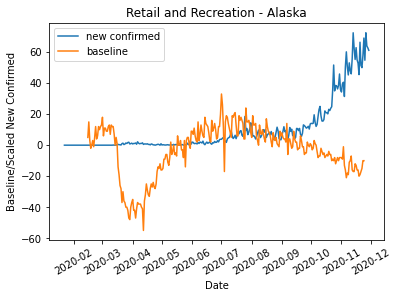

In [78]:
#baseline = []

y_ak_rr = [val.mobility_retail_and_recreation for val in op_alaska.select('mobility_retail_and_recreation').collect()]
x_ak_rr = [val.to_date for val in op_alaska.select('to_date').collect()]

y_ak_nc = [val.scaled_confirmed for val in op_new_confirmed.select('scaled_confirmed').collect()]
x_ak_nc = [val.to_date for val in op_new_confirmed.select('to_date').collect()]

plt.plot(x_ak_nc, y_ak_nc)
plt.plot(x_ak_rr, y_ak_rr)
plt.xticks(rotation=30)
plt.ylabel('Baseline/Scaled New Confirmed')
plt.xlabel('Date')
plt.title('Retail and Recreation - Alaska')
plt.legend(['new confirmed','baseline'], loc='upper left')

plt.show()

In [32]:
op_alaska = op.filter((sFuncs.col('subregion1_name') == 'Alaska')).show()

+----------+---------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|      date|subregion1_name|new_confirmed|new_deceased|new_recovered|new_tested|cumulative_confirmed|cumulative_deceased|cumulative_recovered|cumulative_tested|mobility_transit_stations|mobility_retail_and_recreation|mobility_grocery_and_pharmacy|mobility_parks|mobility_residential|mobility_workplaces|
+----------+---------------+-------------+------------+-------------+----------+--------------------+-------------------+--------------------+-----------------+-------------------------+------------------------------+-----------------------------+--------------+--------------------+-------------------+
|2020-01-01|         Alaska|         null|        null|         null|      null|        

In [8]:
import matplotlib

In [ ]:
#California, Texas, Florida, Illinois, New York
#Massachusetts
#United States

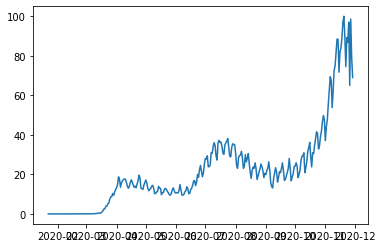

In [85]:
state = 'Massachusetts'

cols = ['date', 'subregion1_name', 'new_confirmed']
op_new_confirmed = op.select(*cols)
op_new_confirmed = op_new_confirmed.groupBy('date').agg(_sum('new_confirmed').alias('new_confirmed'))
#op_new_confirmed = op_new_confirmed.filter((sFuncs.col('subregion1_name') == state))
op_new_confirmed = op_new_confirmed.withColumn('to_date', to_date(op_new_confirmed.date))

max_confirmed = op_new_confirmed.select(sFuncs.max('new_confirmed')).collect()[0][0]
digits = len(str(max_confirmed))
scale = (1/max_confirmed) * 100

op_new_confirmed = op_new_confirmed.withColumn('scaled_confirmed', sFuncs.col('new_confirmed')*(scale))
op_new_confirmed = op_new_confirmed.sort('date')

y1 = [val[0] for val in op_new_confirmed.select('scaled_confirmed').collect()]
x1 = [val[0] for val in op_new_confirmed.select('to_date').collect()]

plt.plot(x1,y1)

In [57]:
from pyspark.sql.functions import desc
from pyspark.sql.functions import mean

sector = 'mobility_retail_and_recreation'
cols = ['date', 'subregion1_name', sector]
sector_usa = sector + "_usa"
op_state_sector = op.select(*cols)
op_state_sector.na.fill(0)
op_state_sector = op_state_sector.withColumn(sector, op_state_sector[sector].cast(IntegerType()))
op_state_sector = op_state_sector.groupBy('date').agg(mean(sector).alias(sector_usa))
#op_state_sector = op_state_sector.filter((sFuncs.col('subregion1_name') == state))
op_state_sector = op_state_sector.withColumn('to_date', to_date(op_state_sector.date))
op_state_sector.sort('date').show()

+----------+----------------------------------+----------+
|      date|mobility_retail_and_recreation_usa|   to_date|
+----------+----------------------------------+----------+
|2020-01-01|                              null|2020-01-01|
|2020-01-02|                              null|2020-01-02|
|2020-01-03|                              null|2020-01-03|
|2020-01-04|                              null|2020-01-04|
|2020-01-05|                              null|2020-01-05|
|2020-01-06|                              null|2020-01-06|
|2020-01-07|                              null|2020-01-07|
|2020-01-08|                              null|2020-01-08|
|2020-01-09|                              null|2020-01-09|
|2020-01-10|                              null|2020-01-10|
|2020-01-11|                              null|2020-01-11|
|2020-01-12|                              null|2020-01-12|
|2020-01-13|                              null|2020-01-13|
|2020-01-14|                              null|2020-01-1

In [98]:
def draw_plot(state, sector, xlabel, ylabel, title, legend, axs, x, y):
    cols = ['date', 'subregion1_name', sector]
    op_state_sector = op.select(*cols)
    op_state_sector = op_state_sector.filter((sFuncs.col('subregion1_name') == state))
    #op_state_sector = op_state_sector.groupBy('date').agg(mean(sector).alias(sector))
    op_state_sector = op_state_sector.withColumn('to_date', to_date(op_state_sector.date))
    op_state_sector = op_state_sector.sort('date')
    #op_state_sector.show()
    
    cols = ['date', 'subregion1_name', 'new_confirmed']
    op_new_confirmed = op.select(*cols)
    op_new_confirmed = op_new_confirmed.filter((sFuncs.col('subregion1_name') == state))
    #op_new_confirmed = op_new_confirmed.groupBy('date').agg(_sum('new_confirmed').alias('new_confirmed'))
    op_new_confirmed = op_new_confirmed.withColumn('to_date', to_date(op_new_confirmed.date))
    op_new_confirmed = op_new_confirmed.withColumn('add_14_days', sFuncs.date_add(op_new_confirmed.to_date, 14))
    op_new_confirmed = op_new_confirmed.withColumn('subtract_14_days', sFuncs.date_add(op_new_confirmed.to_date, -14))
    op_new_confirmed = op_new_confirmed.sort('date')

    max_confirmed = op_new_confirmed.select(sFuncs.max('new_confirmed')).collect()[0][0]
    if max_confirmed > 0:
        digits = len(str(max_confirmed))
        scale = (1/max_confirmed) * 100

        op_new_confirmed = op_new_confirmed.withColumn('scaled_confirmed', sFuncs.col('new_confirmed')*(scale))
        #op_new_confirmed.show()

        y1 = [val[0] for val in op_state_sector.select(sector).collect()]
        x1 = [val[0] for val in op_state_sector.select('to_date').collect()]

        y2 = [val[0] for val in op_new_confirmed.select('scaled_confirmed').collect()]
        x2 = [val[0] for val in op_new_confirmed.select('to_date').collect()]
    
        y3 = [val[0] for val in op_new_confirmed.select('scaled_confirmed').collect()]
        x3 = [val[0] for val in op_new_confirmed.select('add_14_days').collect()]
    
        y4 = [val[0] for val in op_new_confirmed.select('scaled_confirmed').collect()]
        x4 = [val[0] for val in op_new_confirmed.select('subtract_14_days').collect()]

        axs[x, y].plot(x1, y1)
        axs[x, y].plot(x2, y2)
    #axs[x, y].plot(x3, y3)
    #axs[x, y].plot(x4, y4)
        axs[x, y].tick_params(axis='x', rotation=30)
        axs[x, y].set_title(title)
        axs[x, y].legend(legend, loc='upper left')

In [87]:
mobility_list = ['mobility_retail_and_recreation', 'mobility_parks', 'mobility_residential',
                 'mobility_grocery_and_pharmacy', 'mobility_workplaces', 'mobility_transit_stations']
xlabel = 'Date'
ylabel = 'Baseline/Scaled New Confirmed'
legend = ['baseline', 'new confirmed']



In [93]:
mobility_list = ['mobility_retail_and_recreation', 'mobility_parks', 'mobility_residential',
                 'mobility_grocery_and_pharmacy', 'mobility_workplaces', 'mobility_transit_stations']
#states = ['California', 'Texas', 'Florida', 'Illinois', 'New York']
states = ['Massachusetts']
xlabel = 'Date'
ylabel = 'Baseline/Scaled New Confirmed'
legend = ['baseline', 'new confirmed']

In [96]:
def get_graph_for_states(states, mobility_list):
    for state in states:
        fig, axs = plt.subplots(2, 3, figsize = (16, 9))
        fig.subplots_adjust(hspace=0.5)
        coordinates = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
        index = 0
        for sector in mobility_list:
            title = sector + " in " + state
            draw_plot(state, sector, xlabel, ylabel, title, legend, axs, coordinates[index][0], coordinates[index][1])
            index = index + 1
        
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

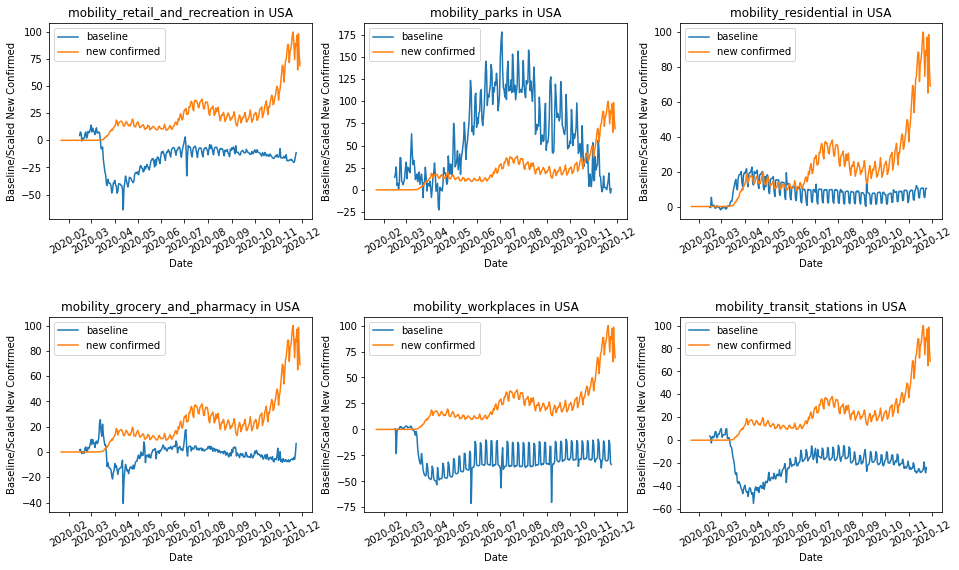

In [89]:
#USA
get_graph_for_states(states, mobility_list)

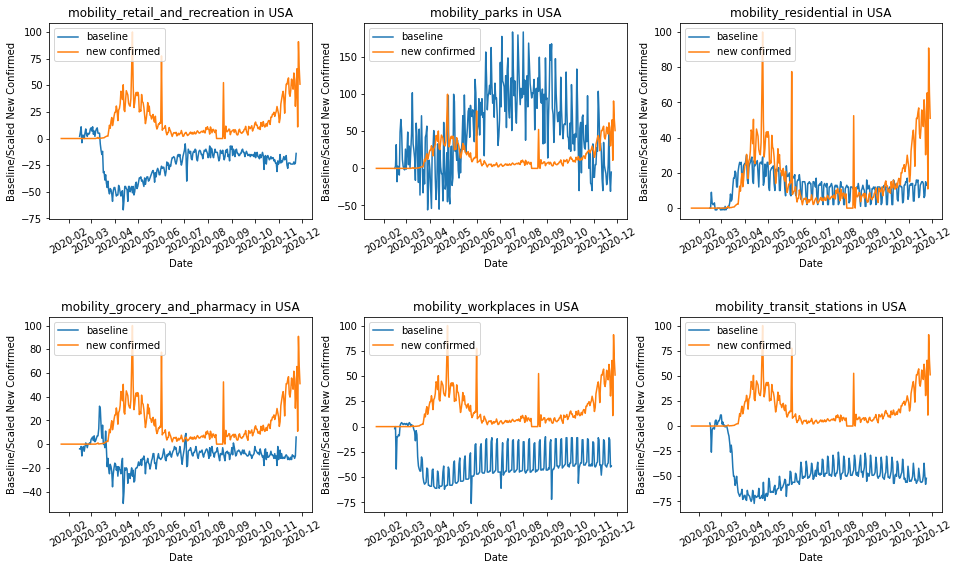

In [94]:
#Impact of COVID-19 on Mobility (Massachusetts)
states = ['Massachusetts']
get_graph_for_states(states, mobility_list)

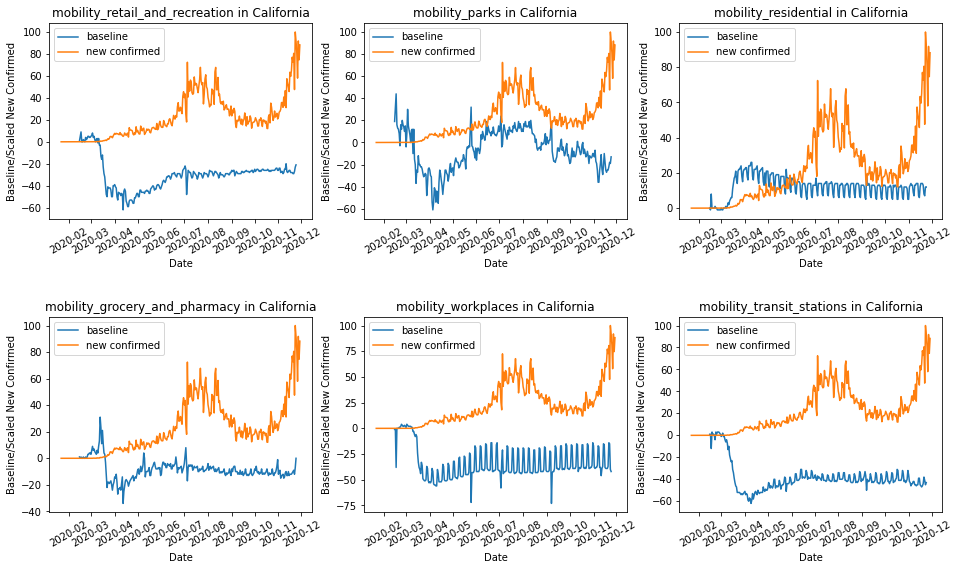

In [69]:
#California
states = ['California']
get_graph_for_states(states, mobility_list)

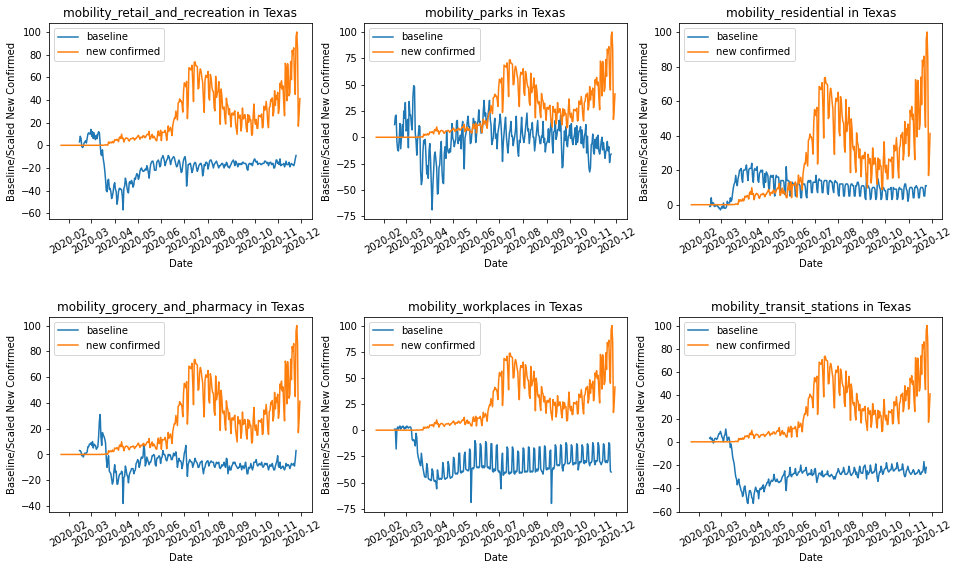

In [70]:
#Texas
states = ['Texas']
get_graph_for_states(states, mobility_list)

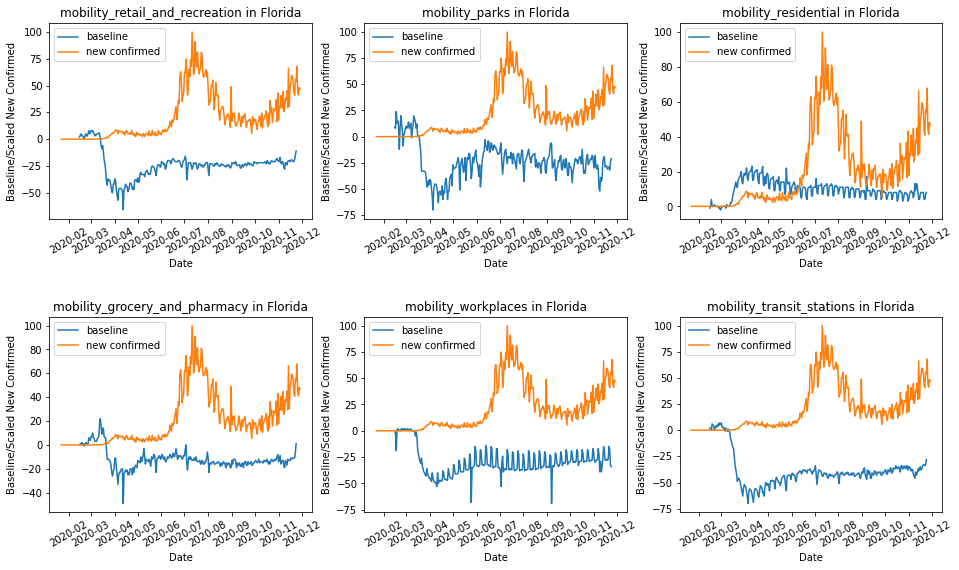

In [71]:
#Florida
states = ['Florida']
get_graph_for_states(states, mobility_list)

In [91]:
all_states = [x[0] for x in op.select('subregion1_name').distinct().collect()]
all_states

['Utah',
 'Hawaii',
 'Minnesota',
 'Ohio',
 'Northern Mariana Islands',
 'Arkansas',
 'Oregon',
 'Texas',
 'North Dakota',
 'Pennsylvania',
 'Connecticut',
 'Nebraska',
 'Vermont',
 'American Samoa',
 'Nevada',
 'Puerto Rico',
 'Washington',
 'Illinois',
 'Oklahoma',
 'Virgin Islands',
 'District of Columbia',
 'Delaware',
 'Alaska',
 'New Mexico',
 'West Virginia',
 'Missouri',
 'Rhode Island',
 'Georgia',
 'Montana',
 'Virginia',
 'Michigan',
 'Guam',
 'North Carolina',
 'Wyoming',
 'Kansas',
 'New Jersey',
 'Maryland',
 'Alabama',
 'Arizona',
 'Iowa',
 'Massachusetts',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'New Hampshire',
 'Tennessee',
 'Florida',
 'Indiana',
 'Idaho',
 'South Carolina',
 'South Dakota',
 'California',
 'New York',
 'Wisconsin',
 'Maine',
 'Colorado']

<ipython-input-96-07477b716133>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 3, figsize = (16, 9))


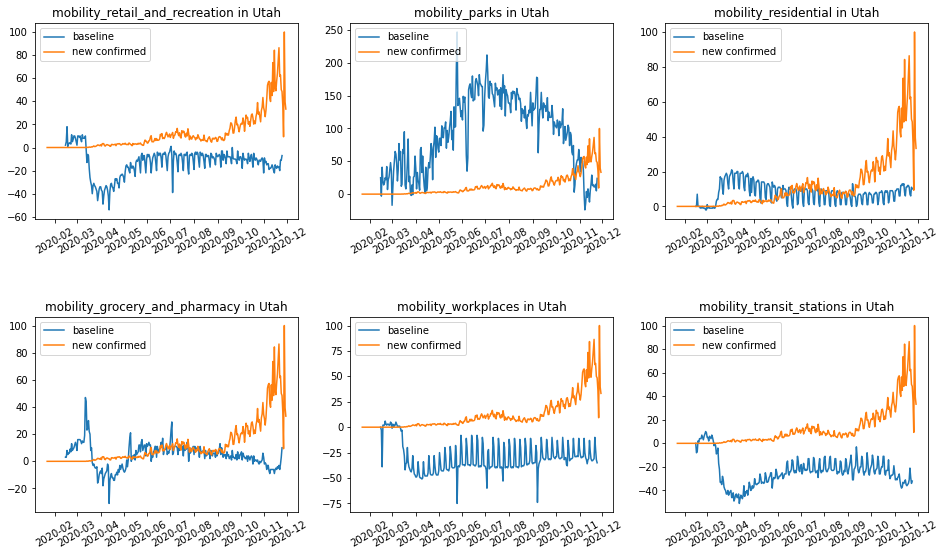

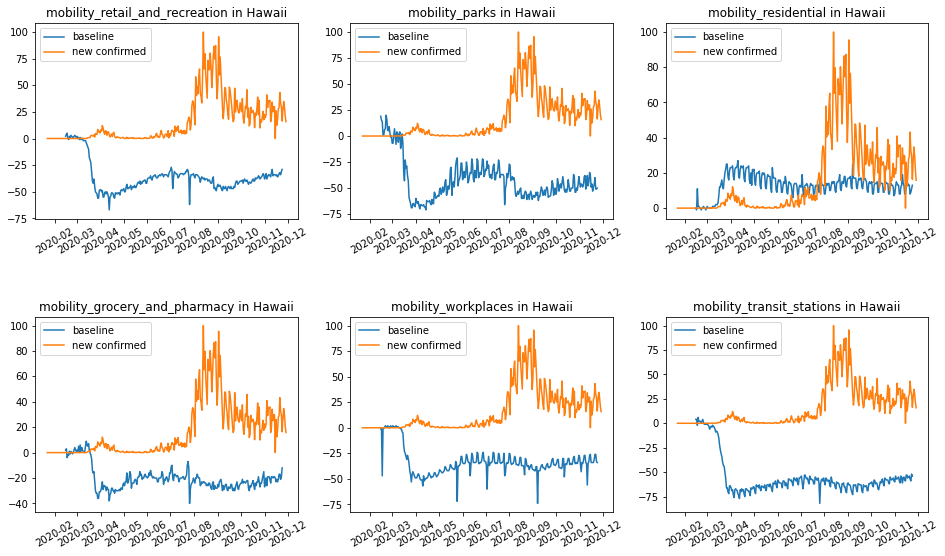

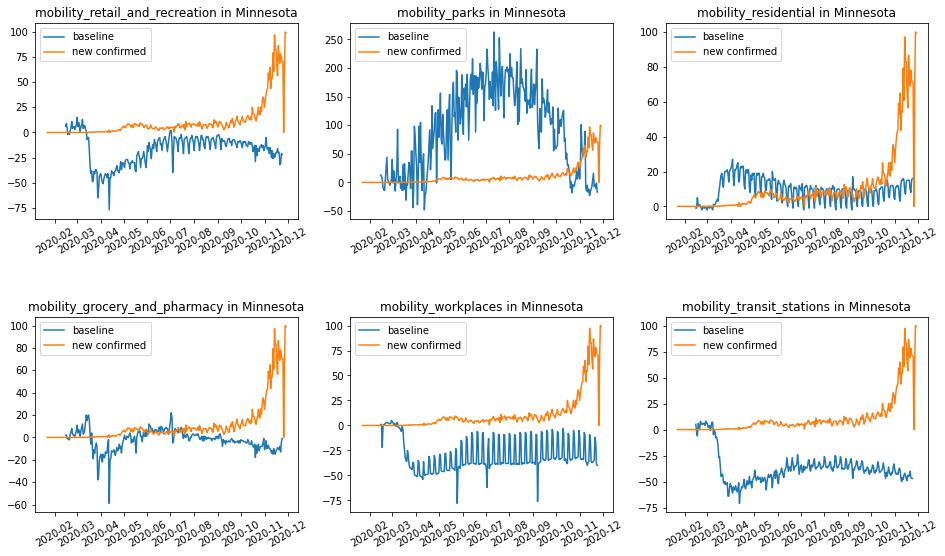

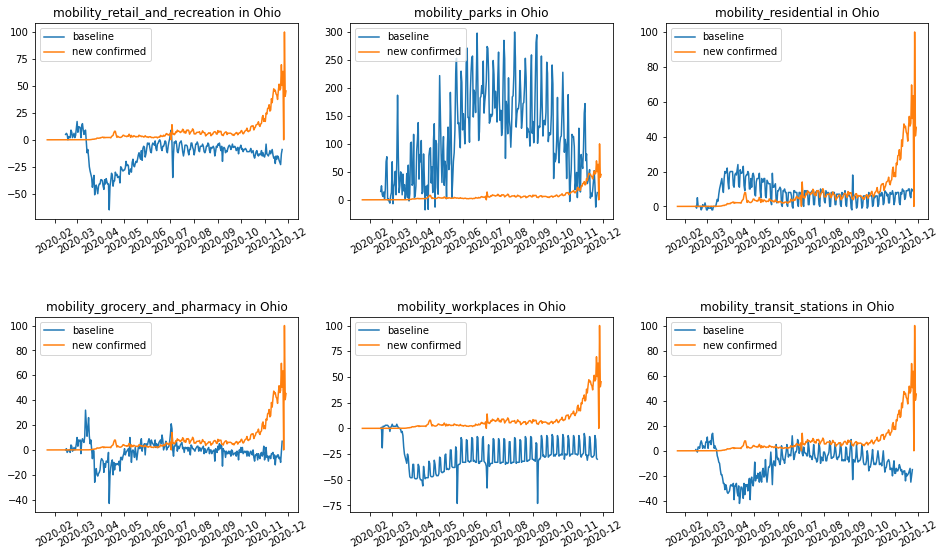

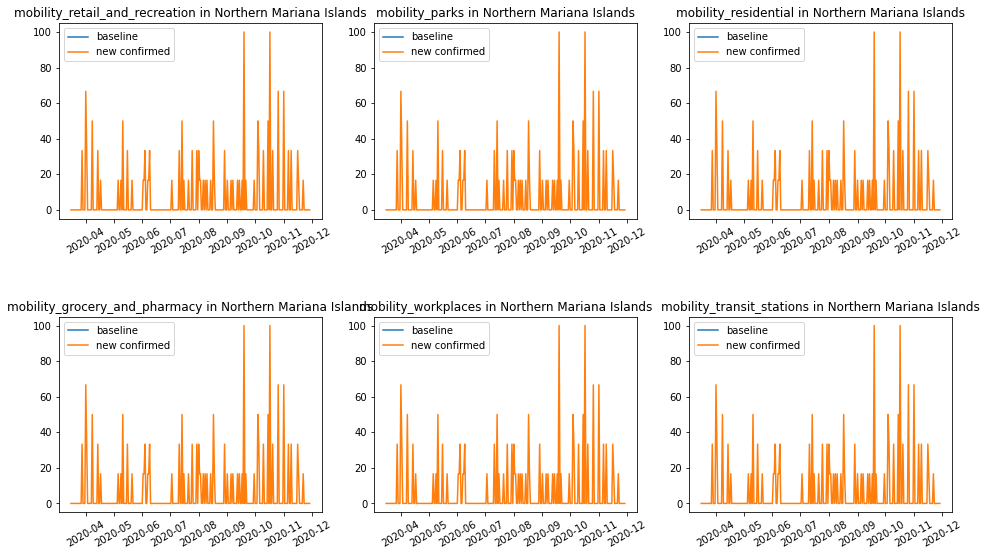

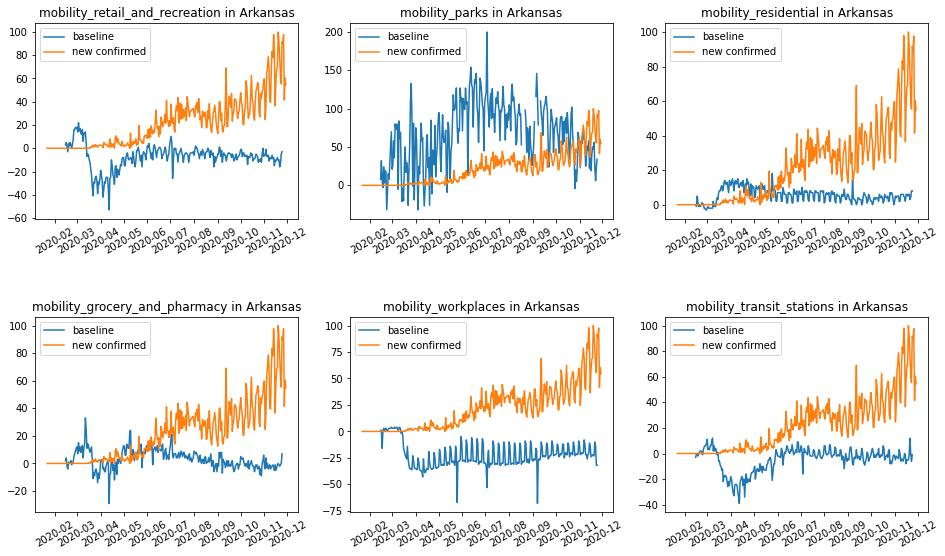

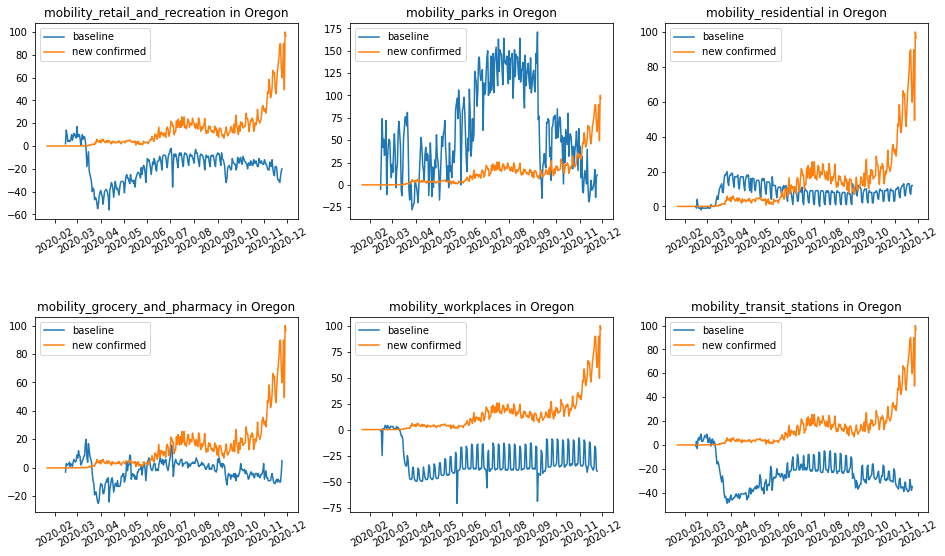

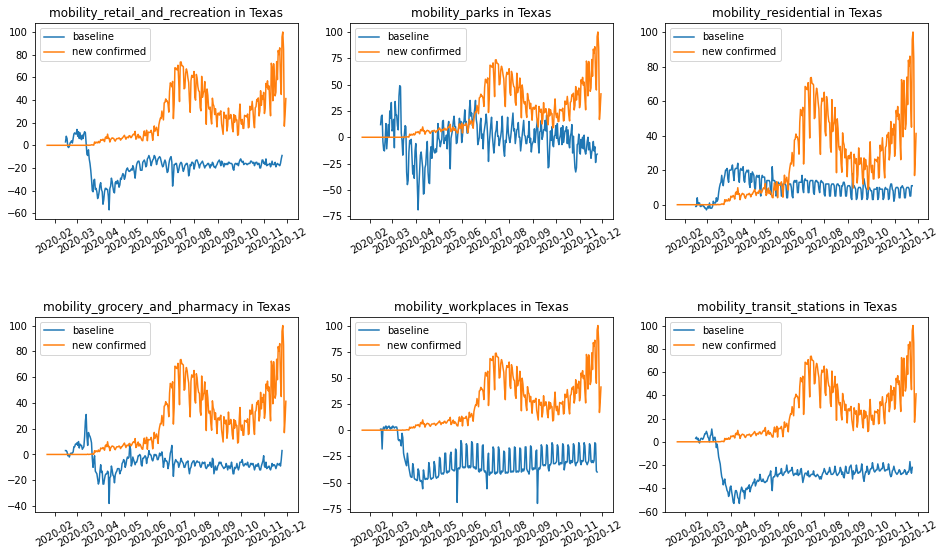

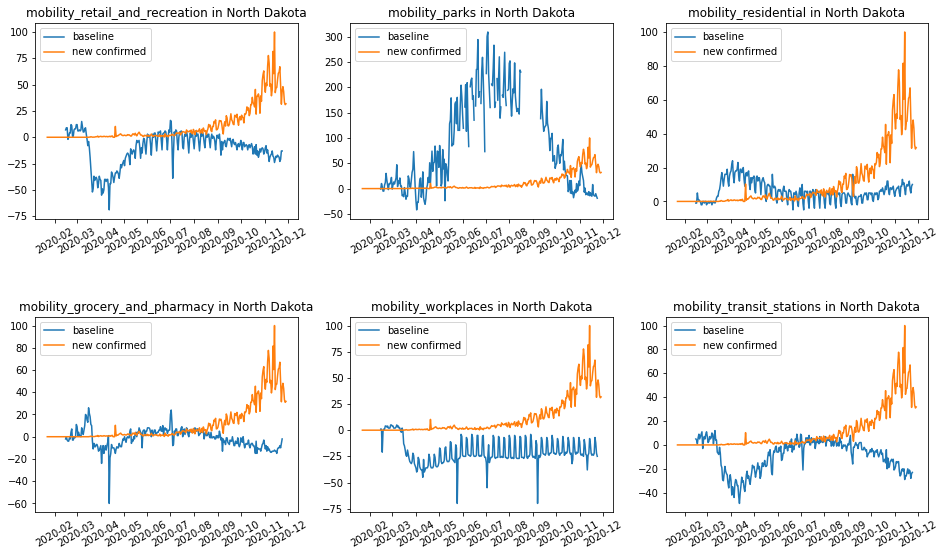

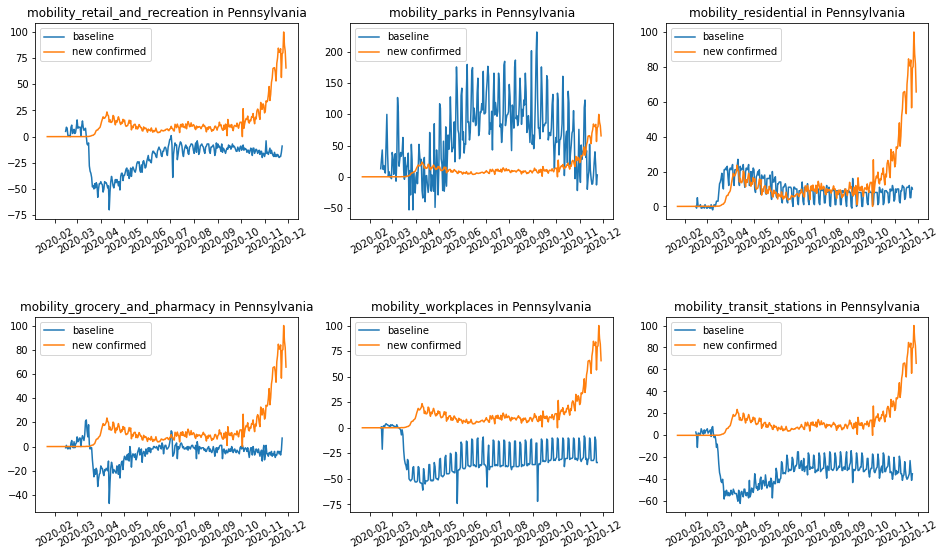

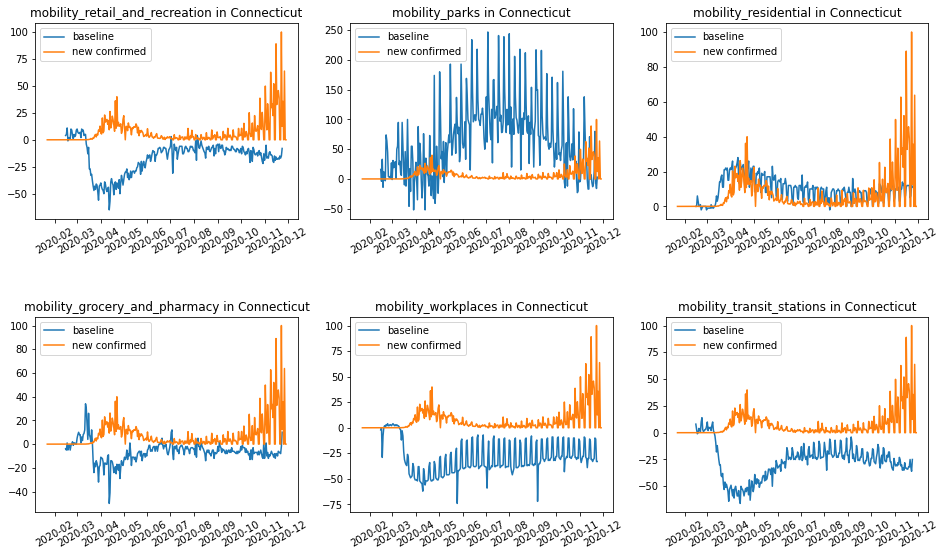

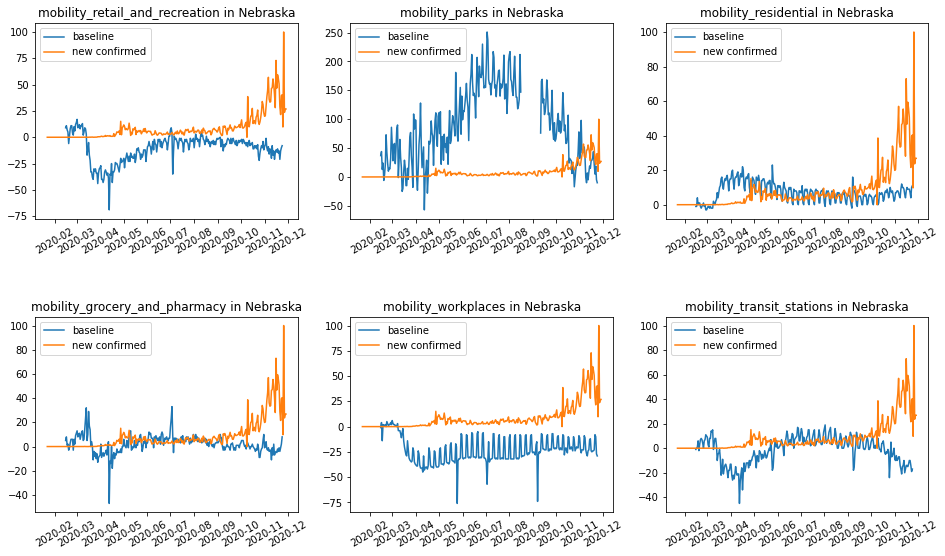

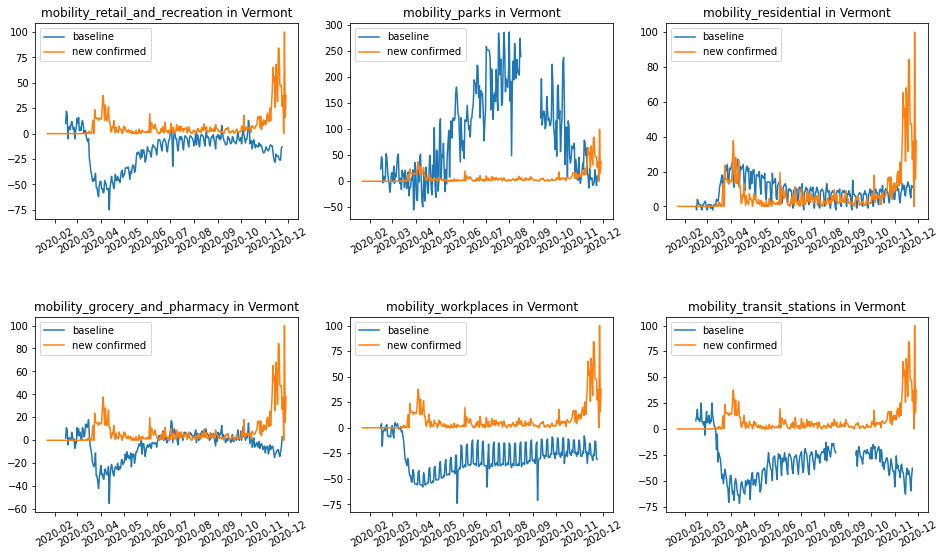

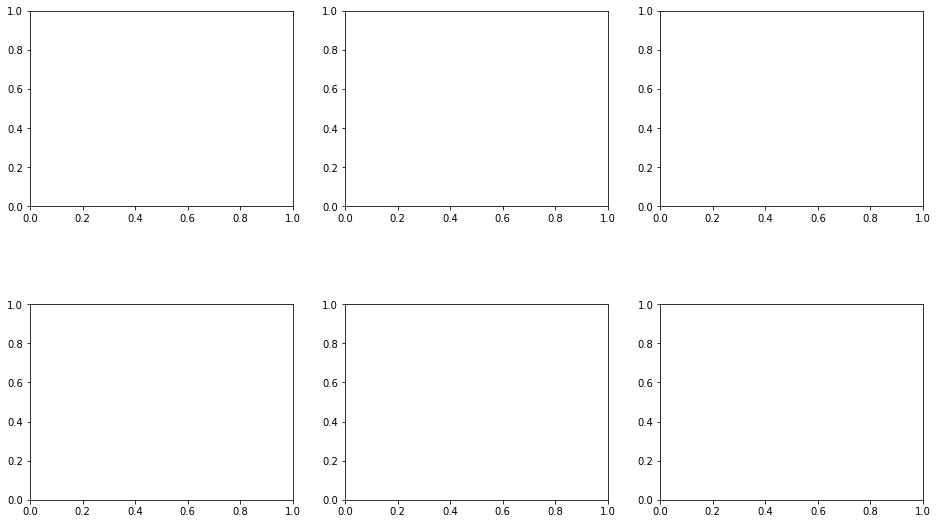

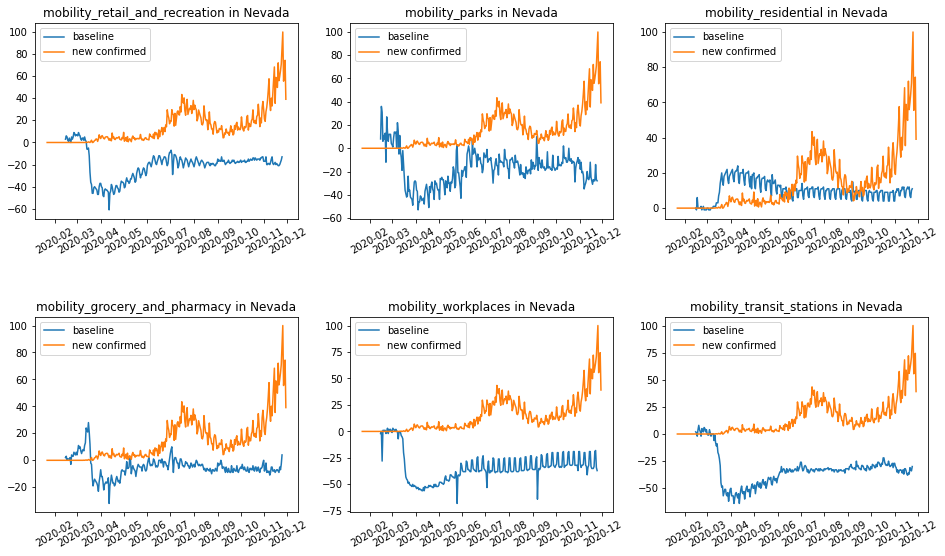

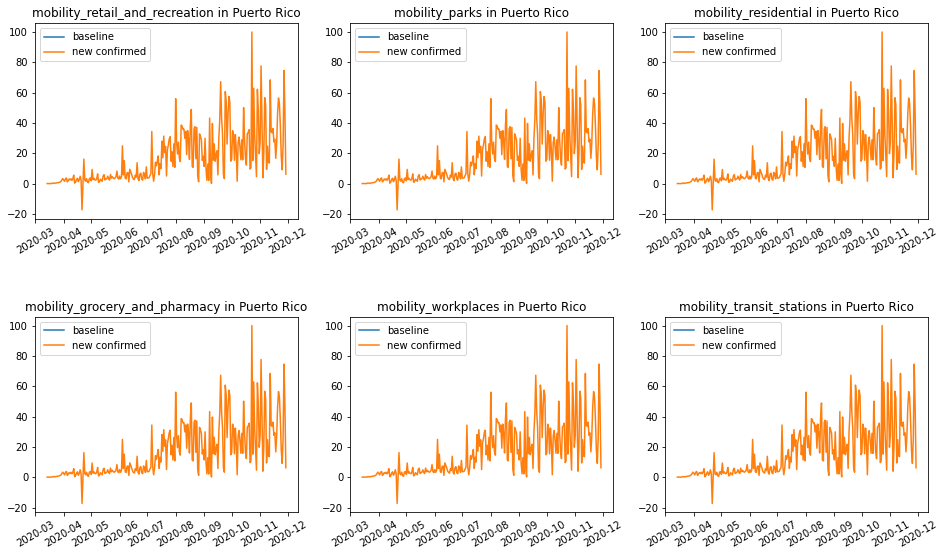

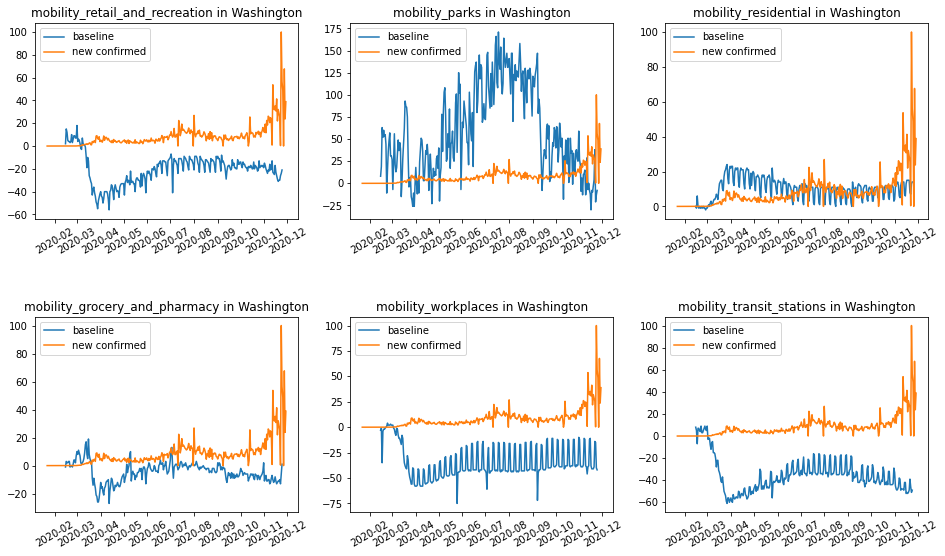

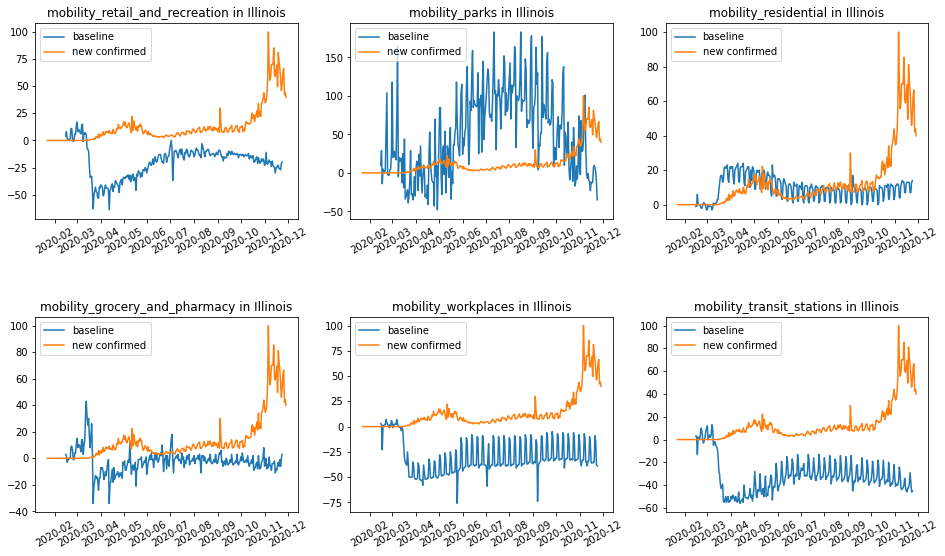

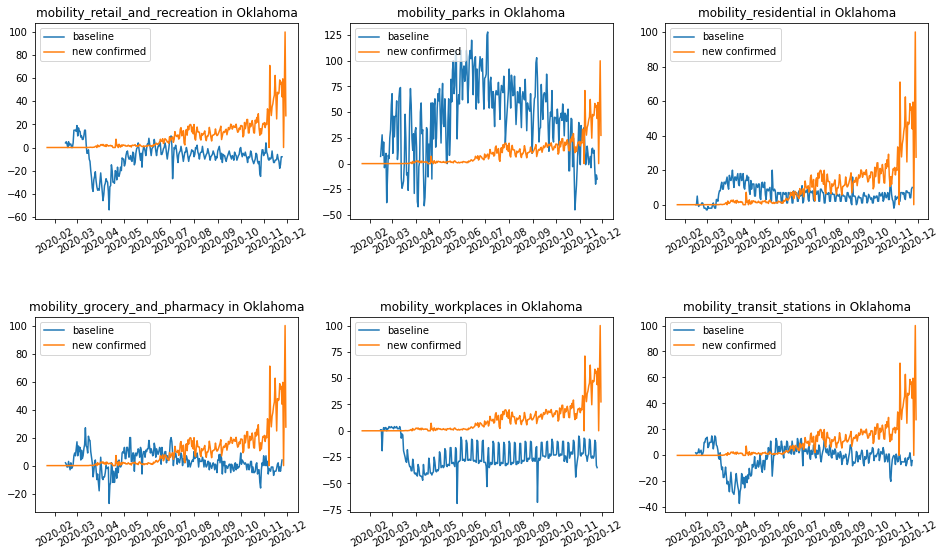

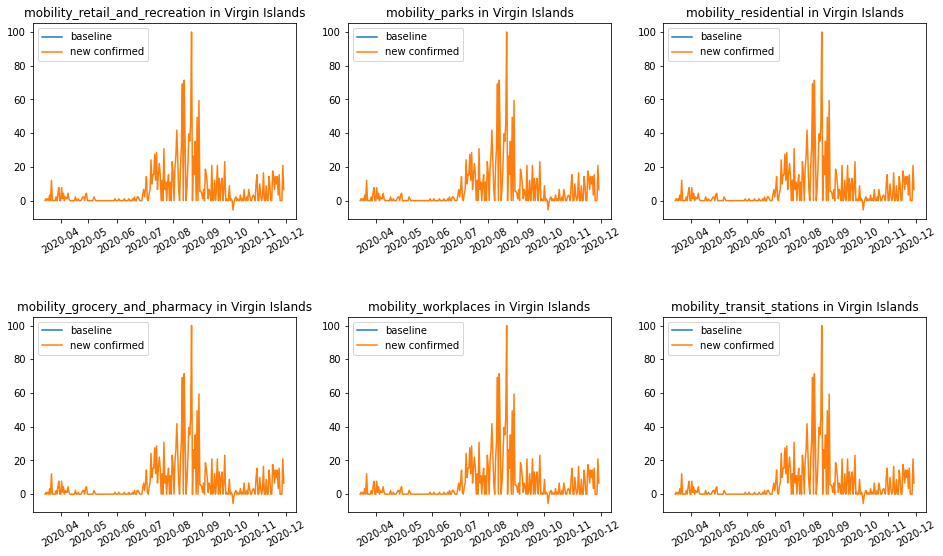

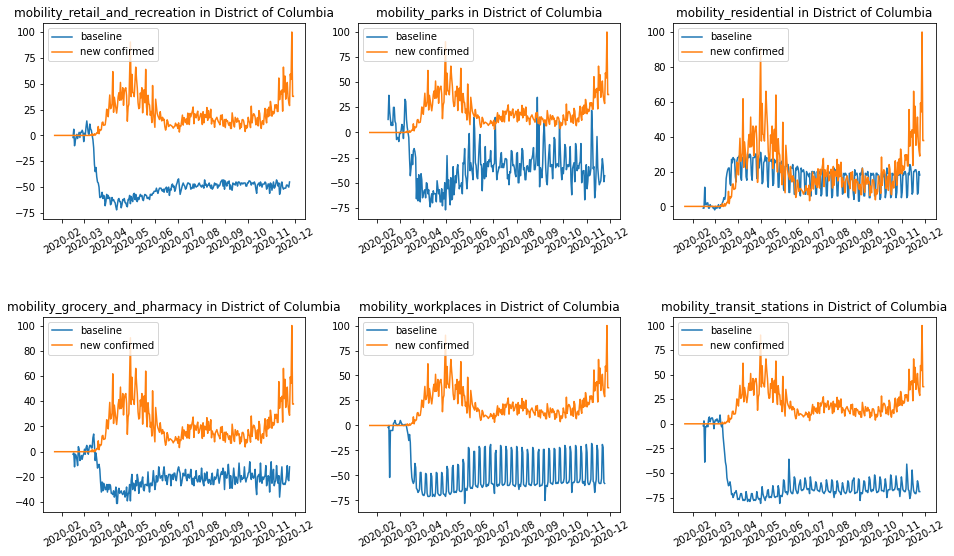

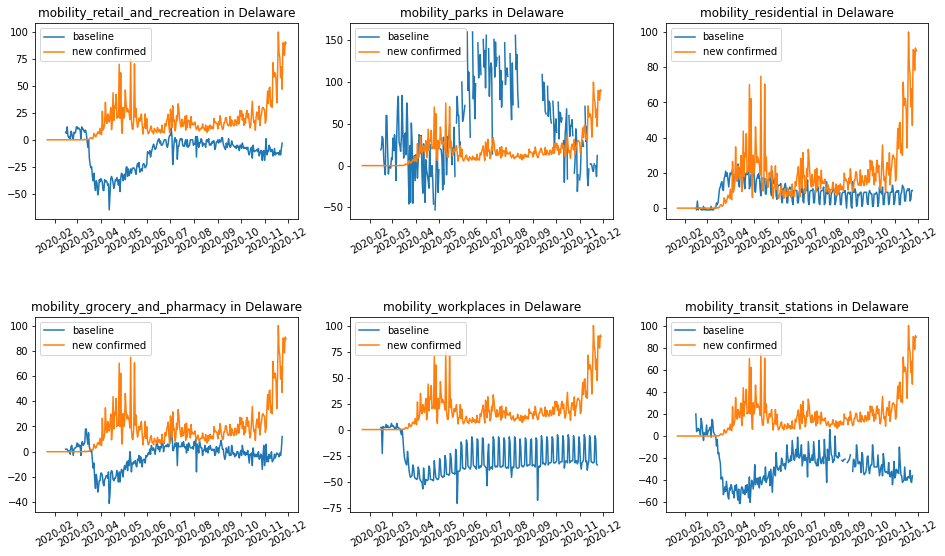

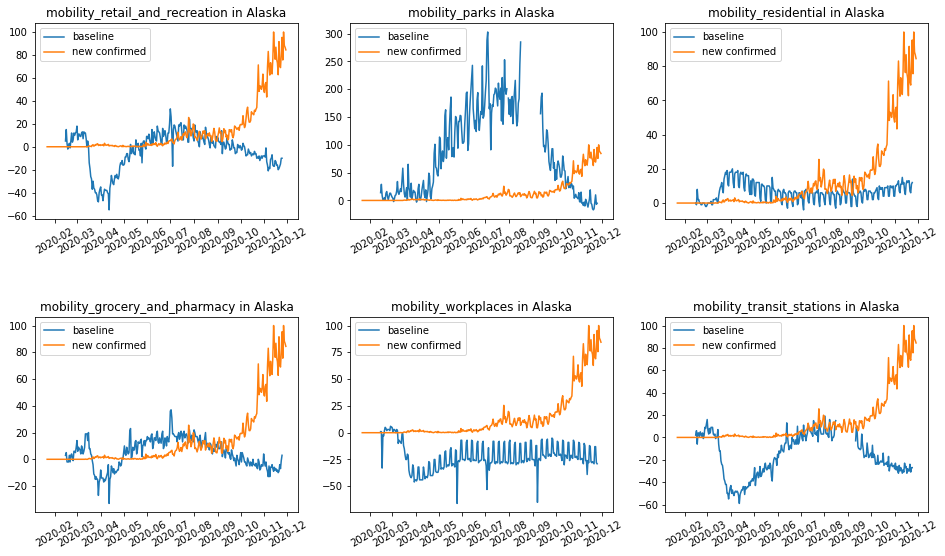

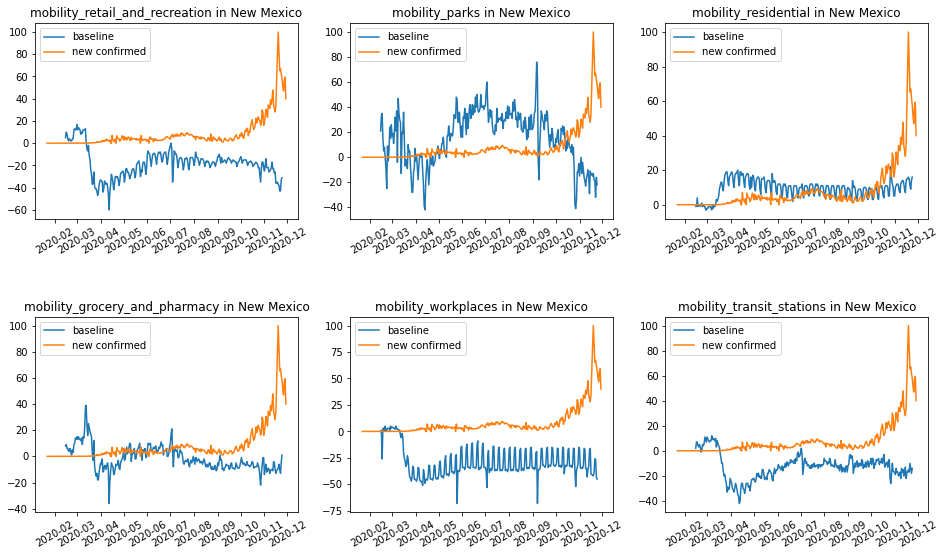

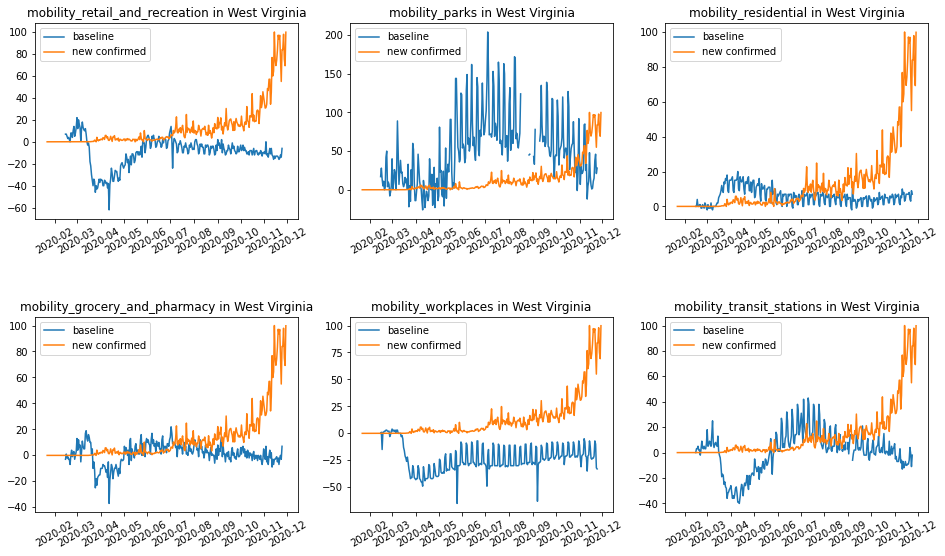

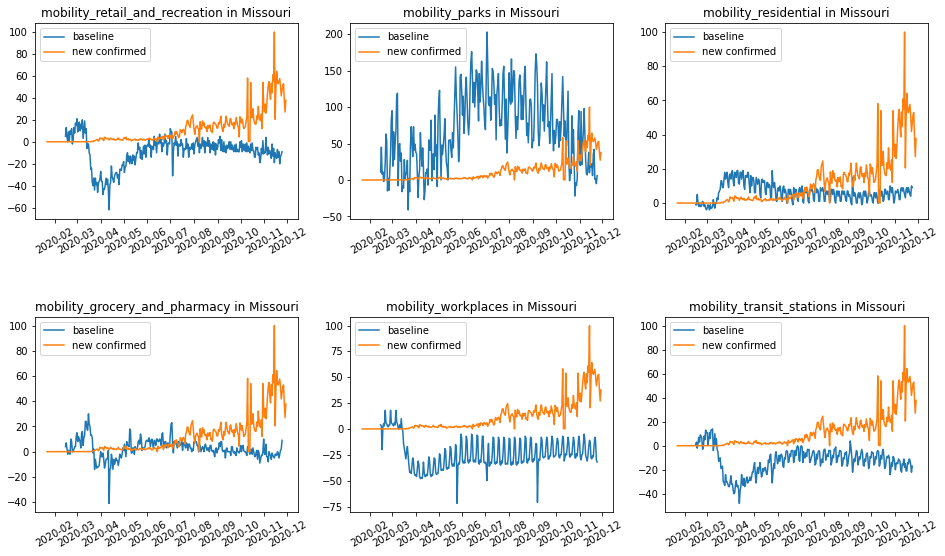

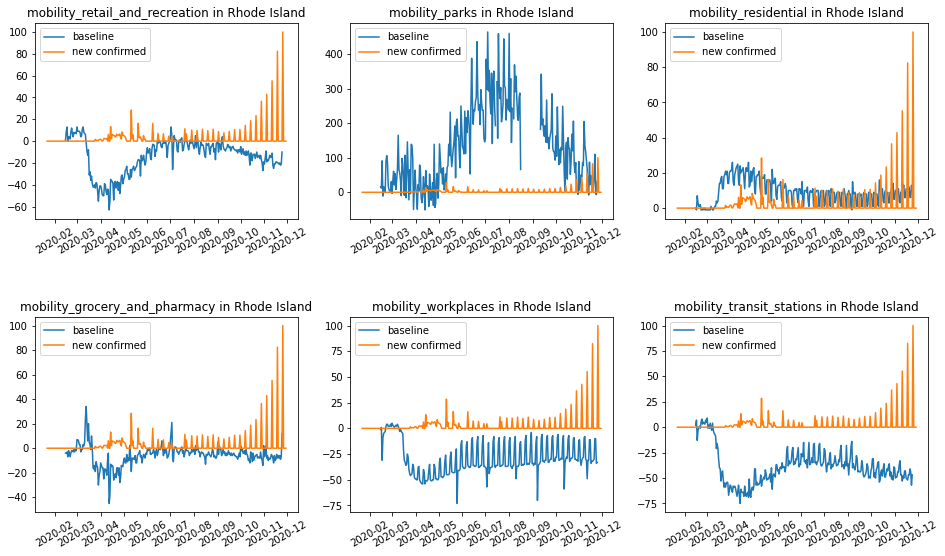

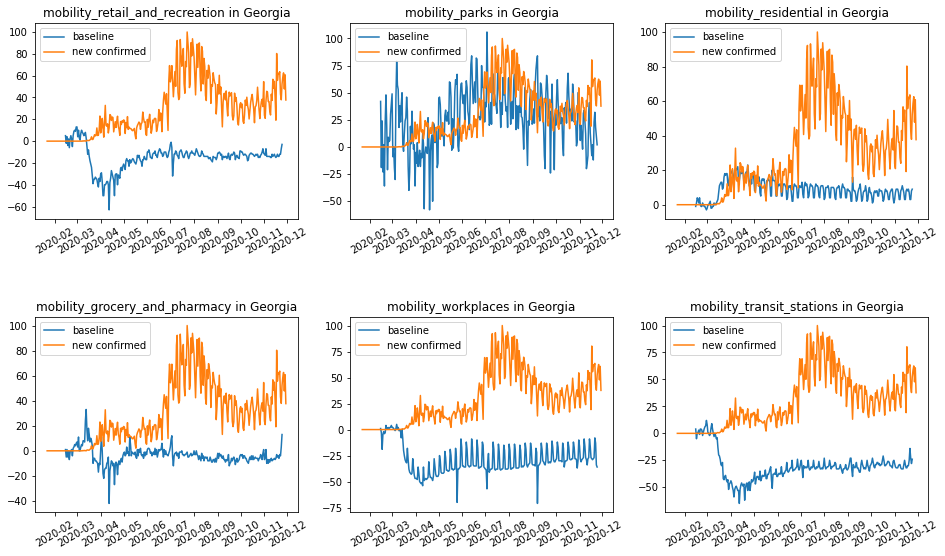

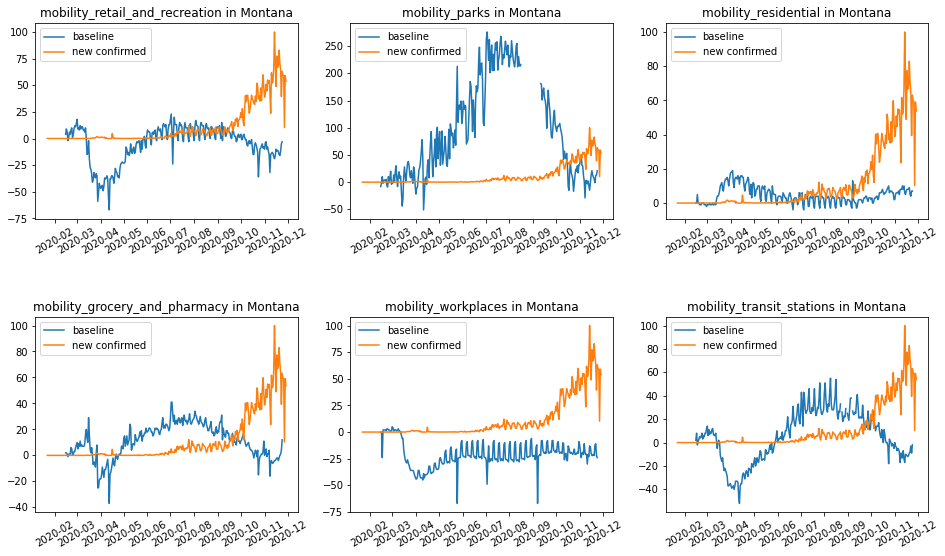

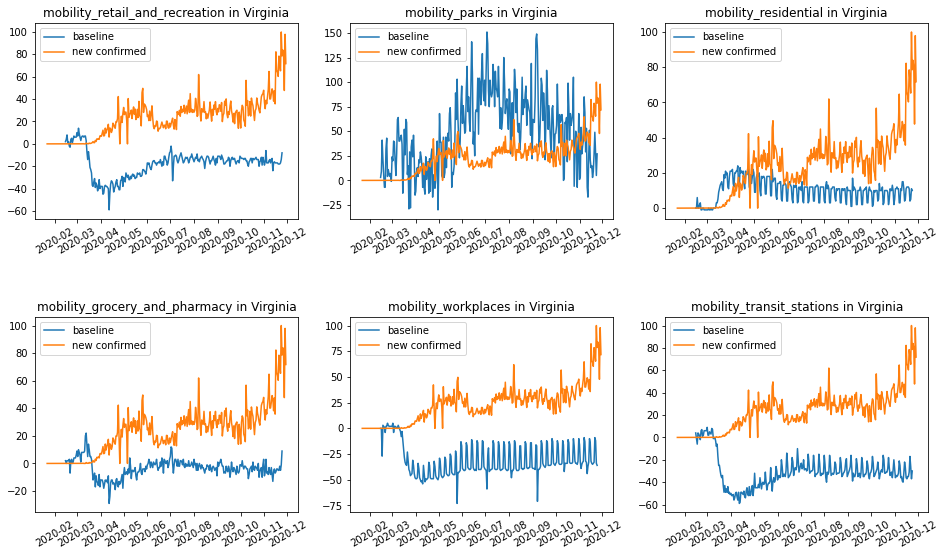

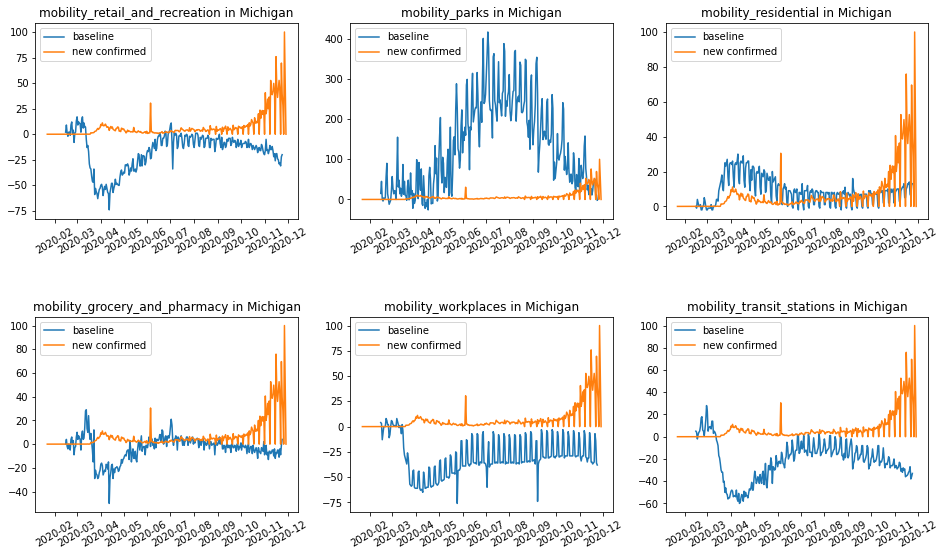

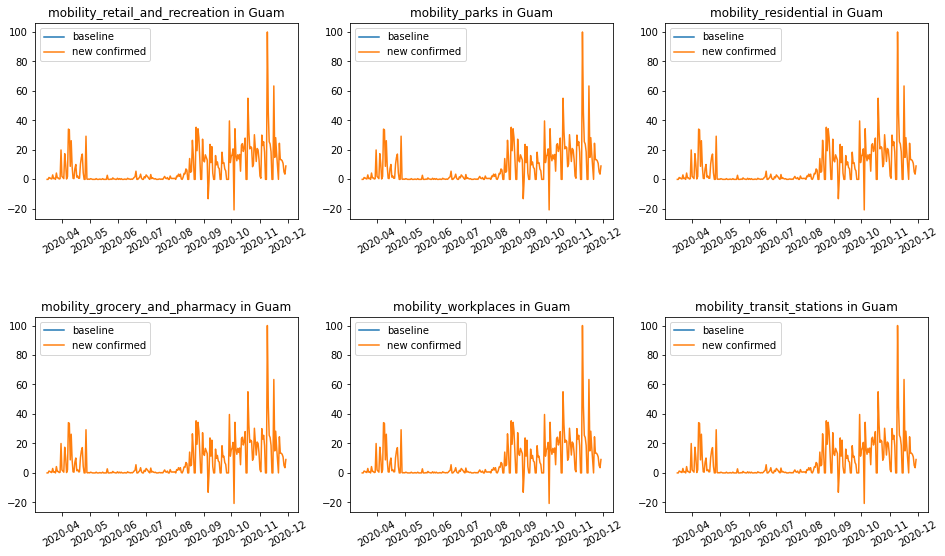

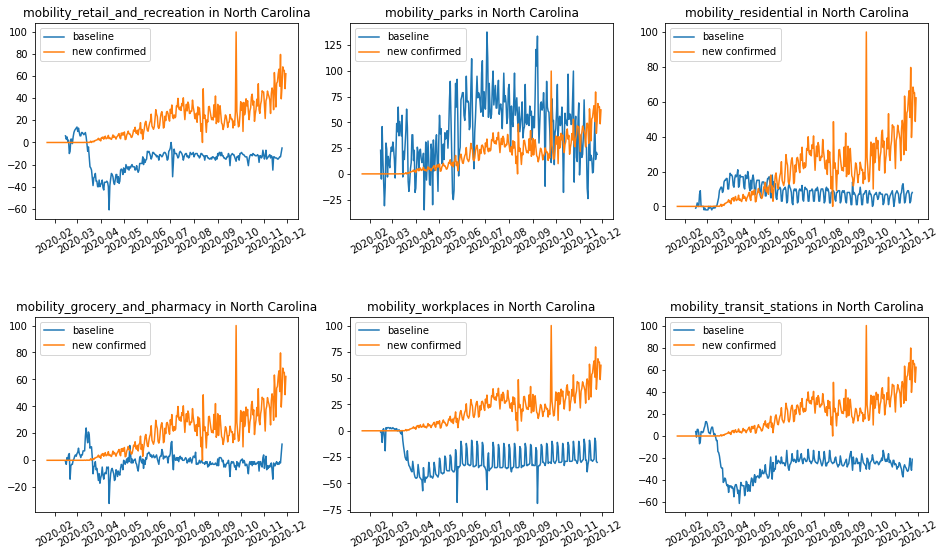

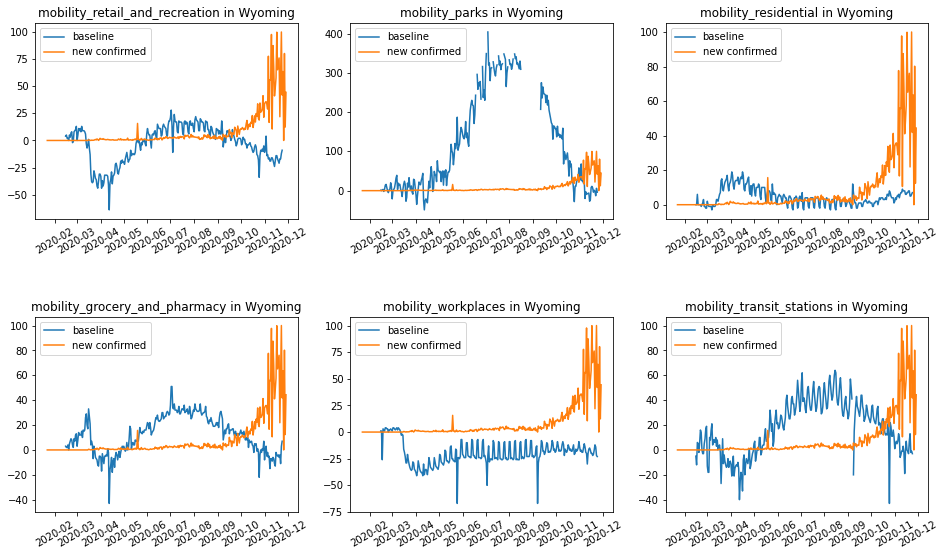

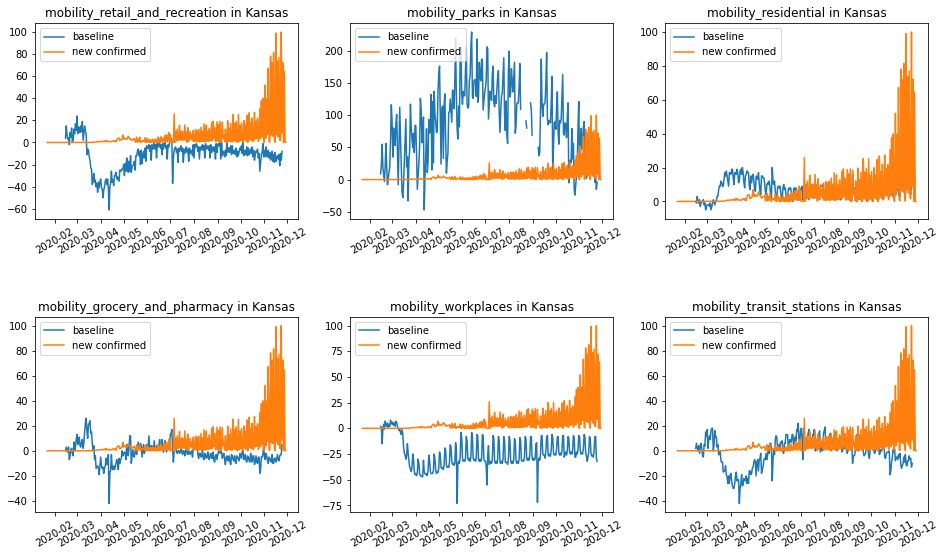

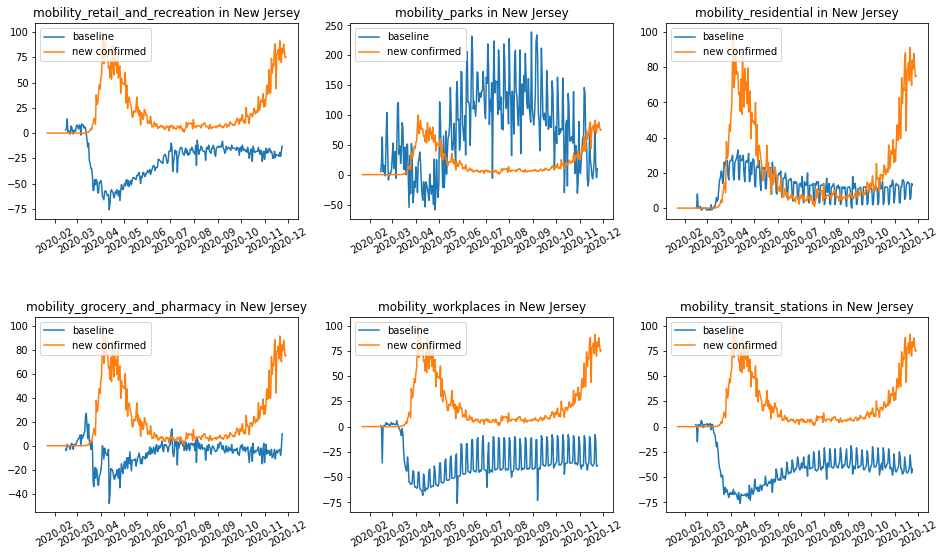

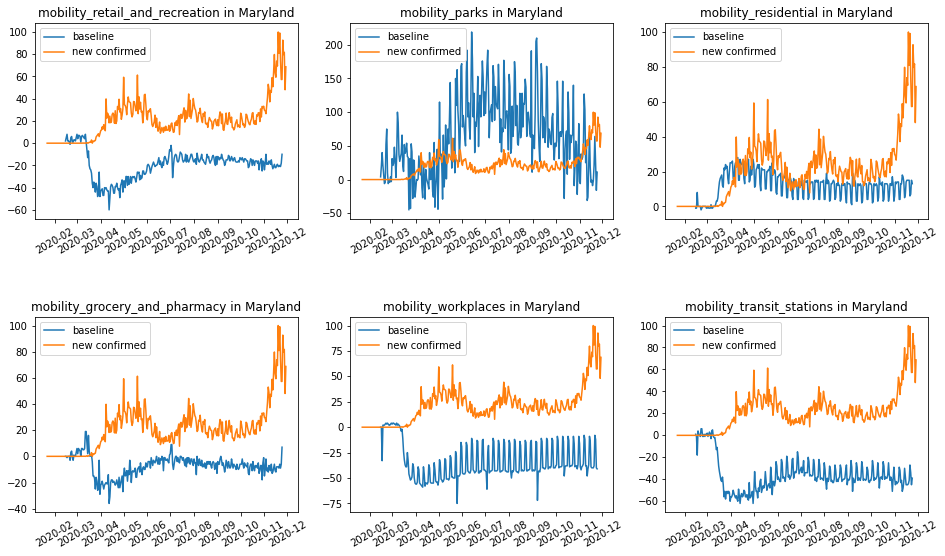

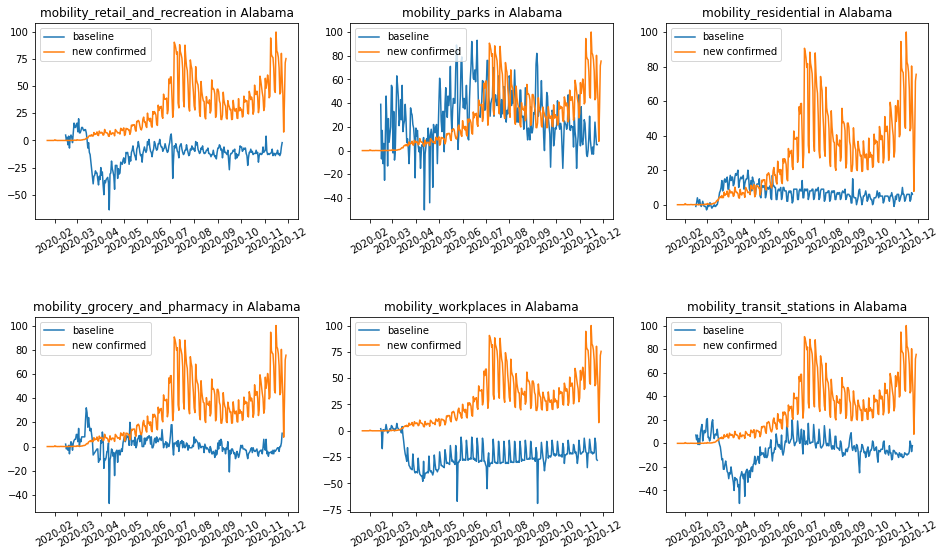

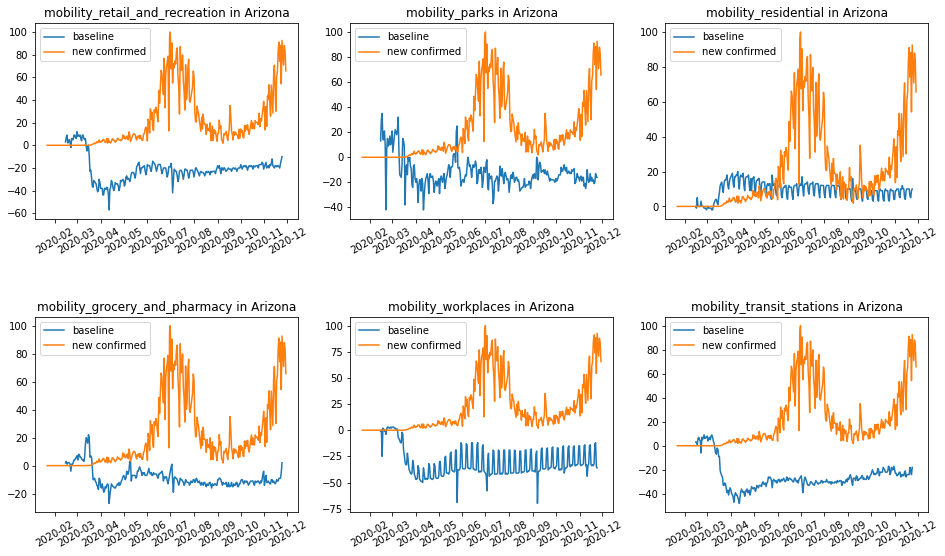

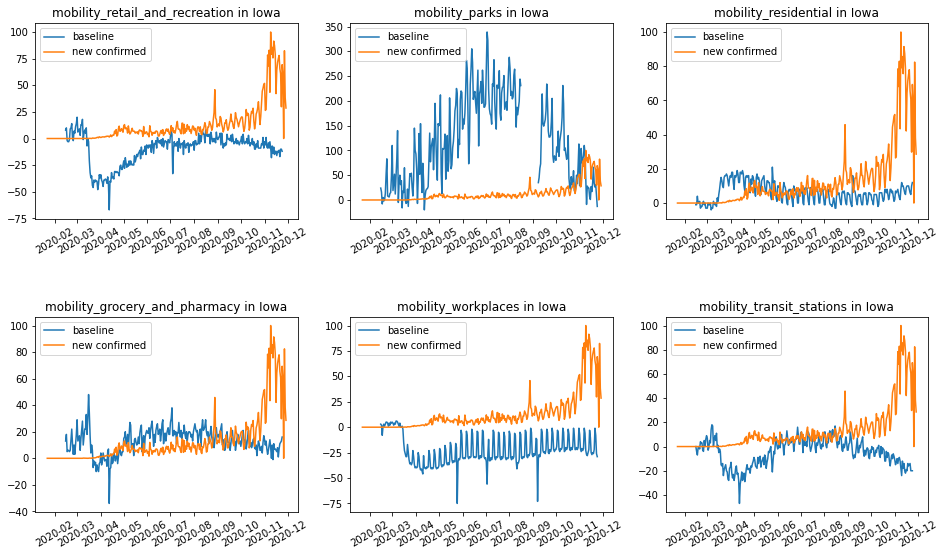

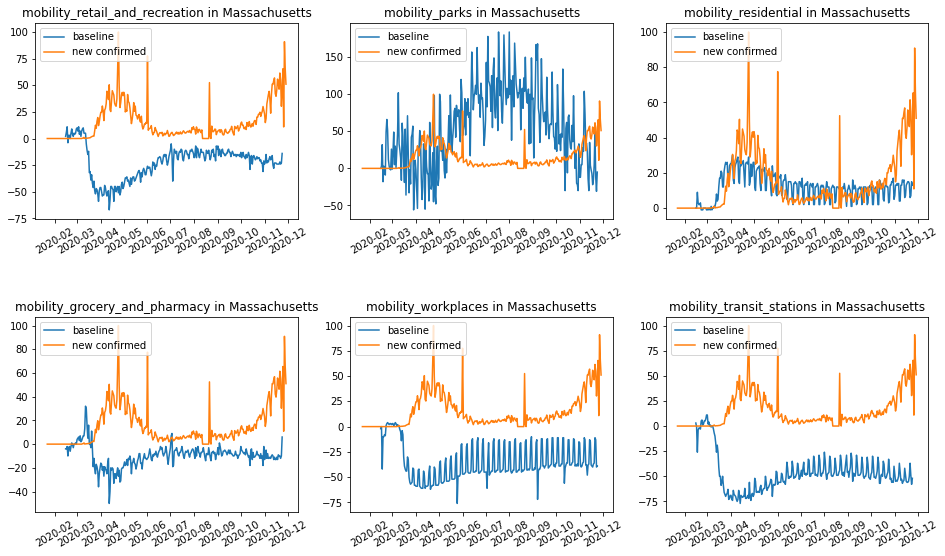

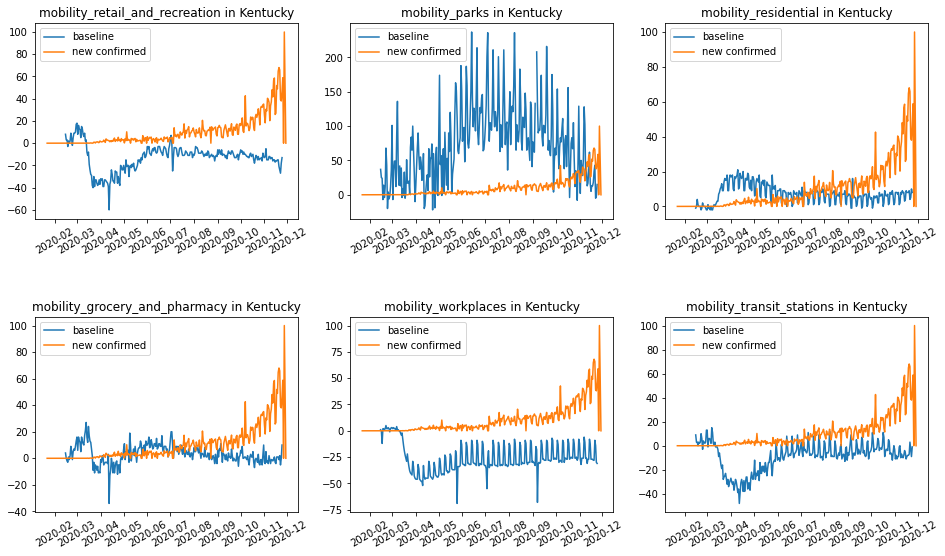

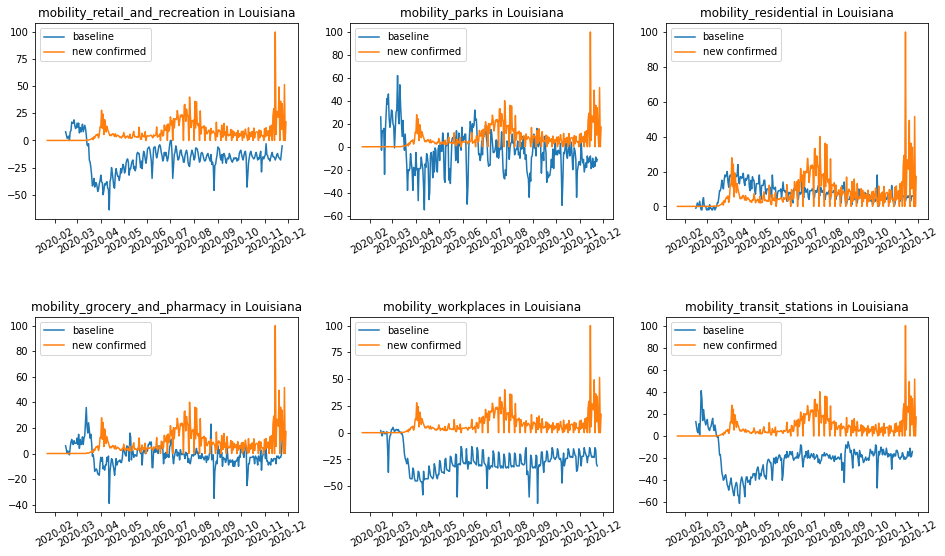

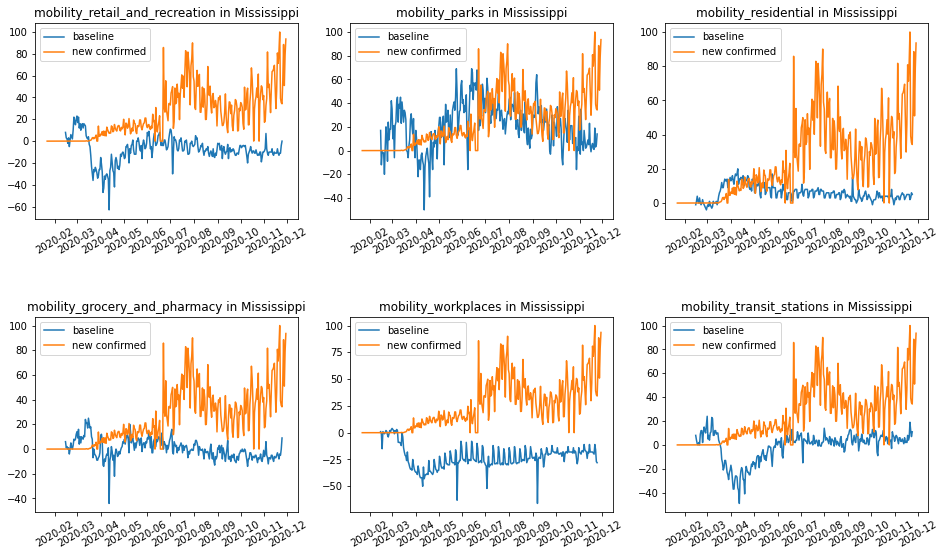

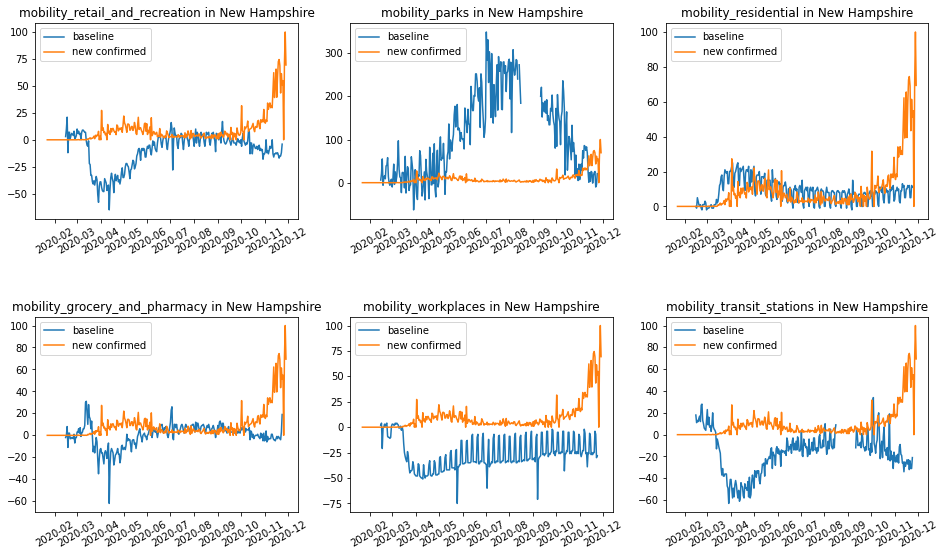

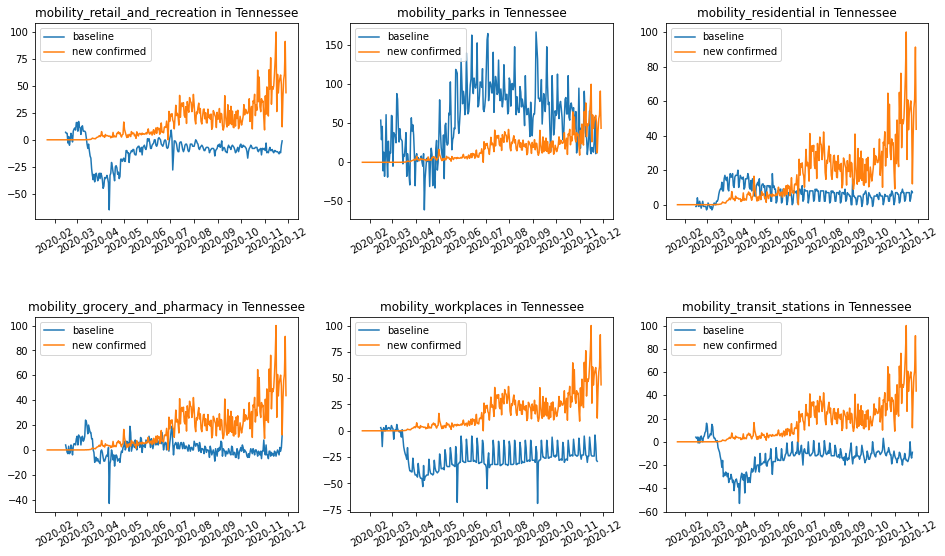

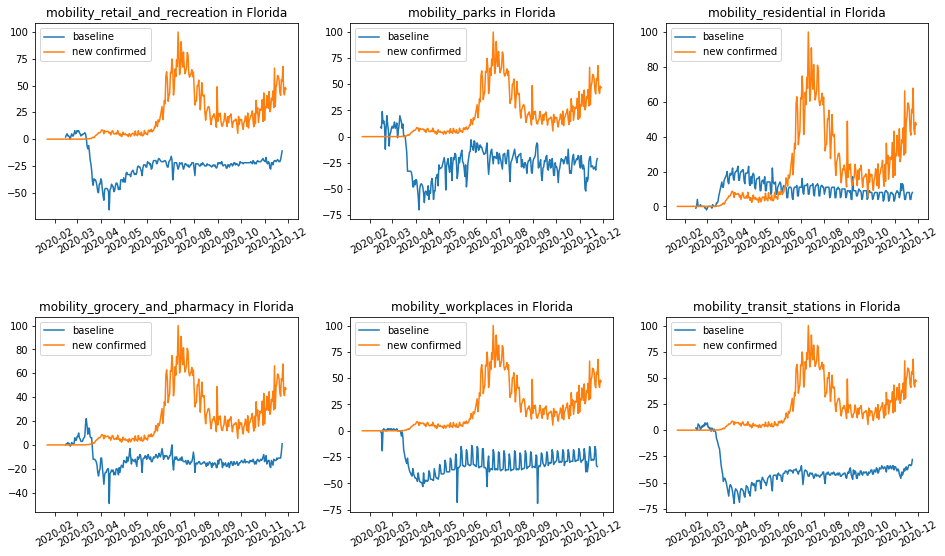

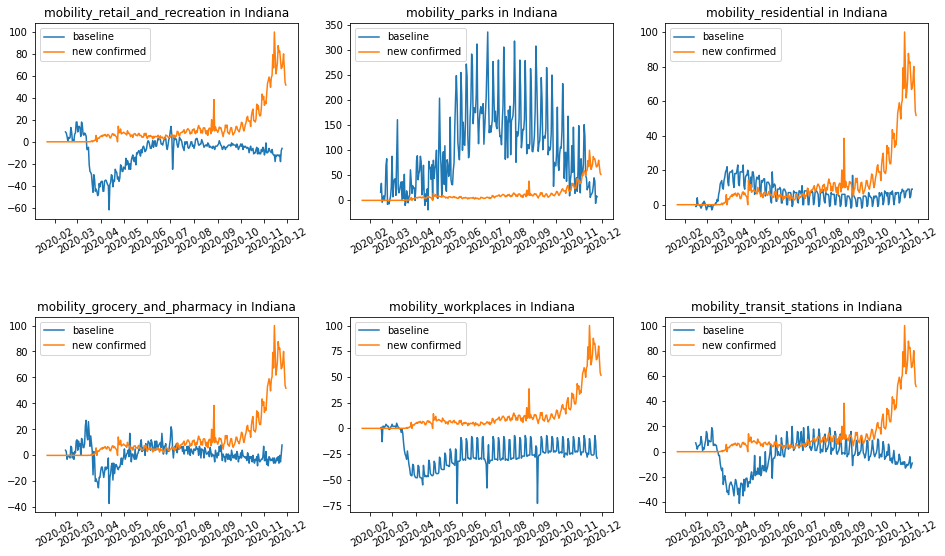

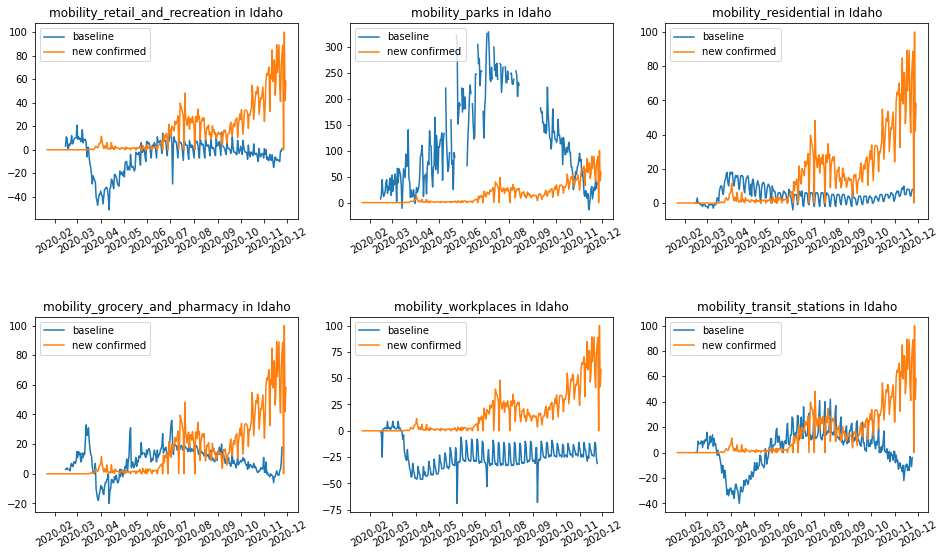

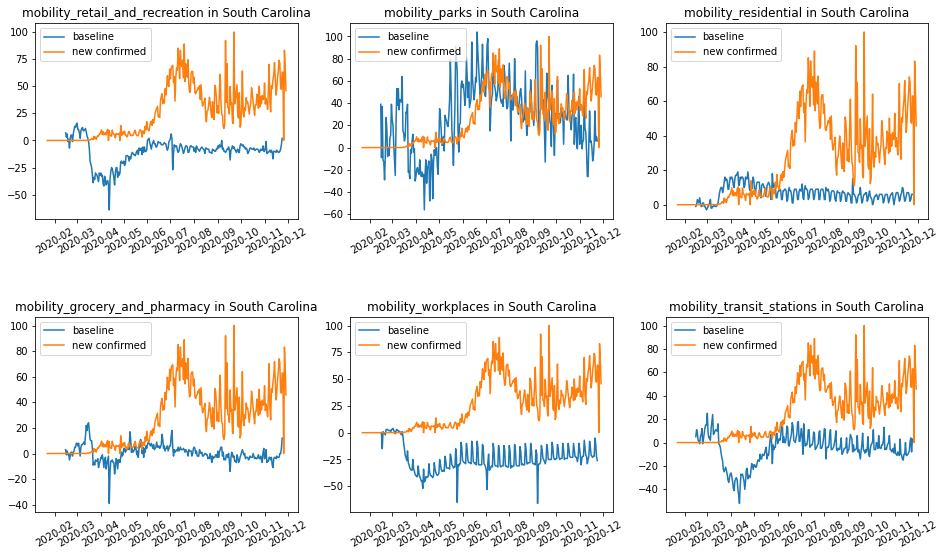

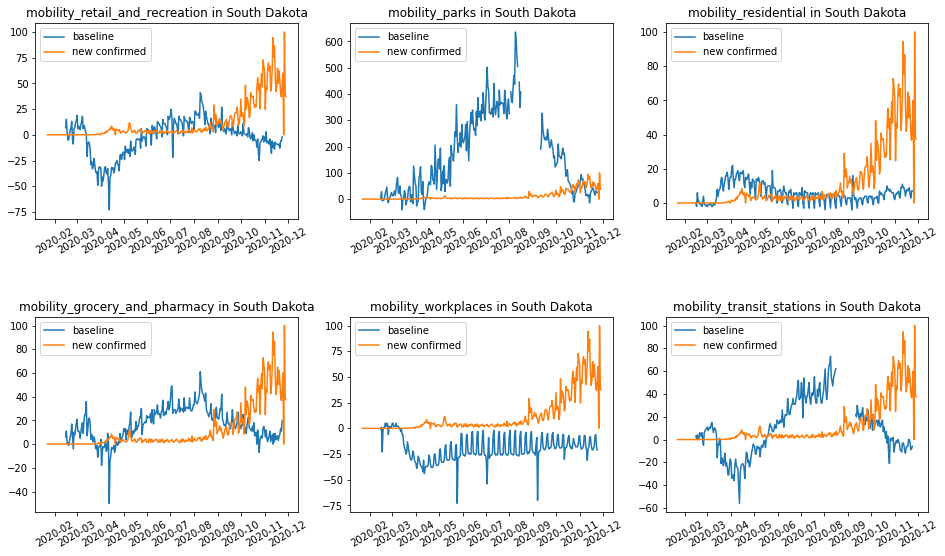

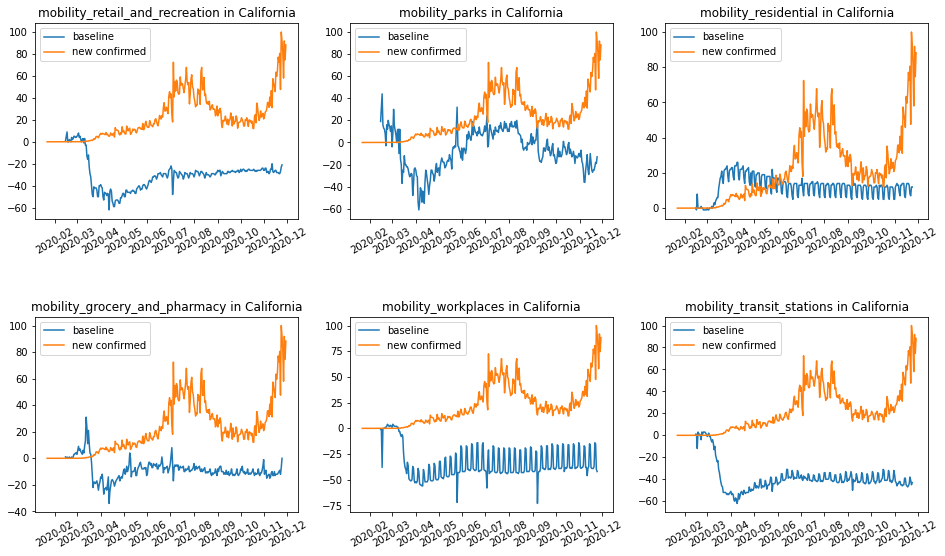

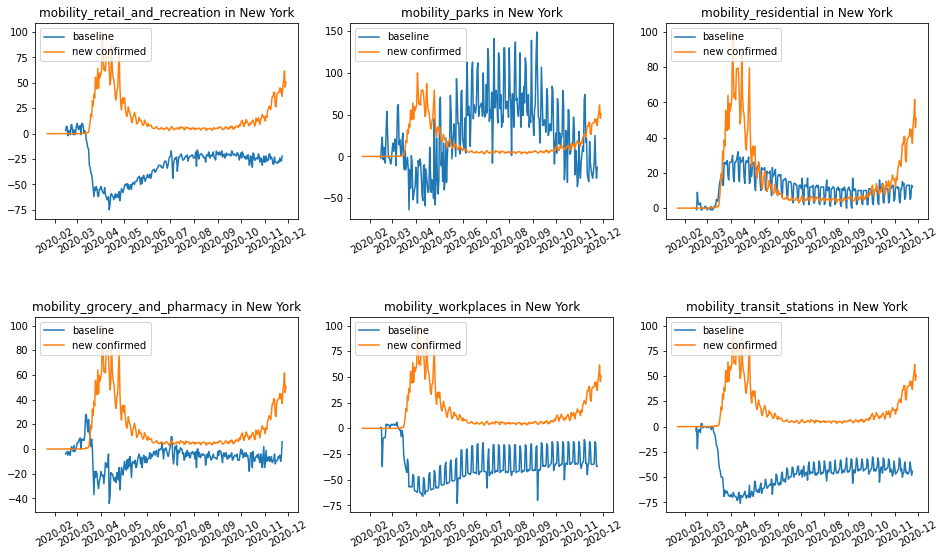

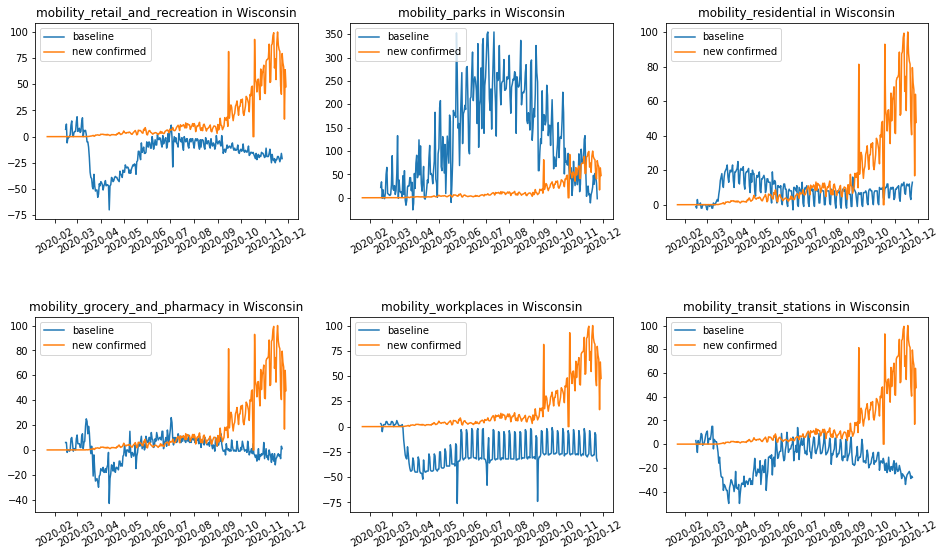

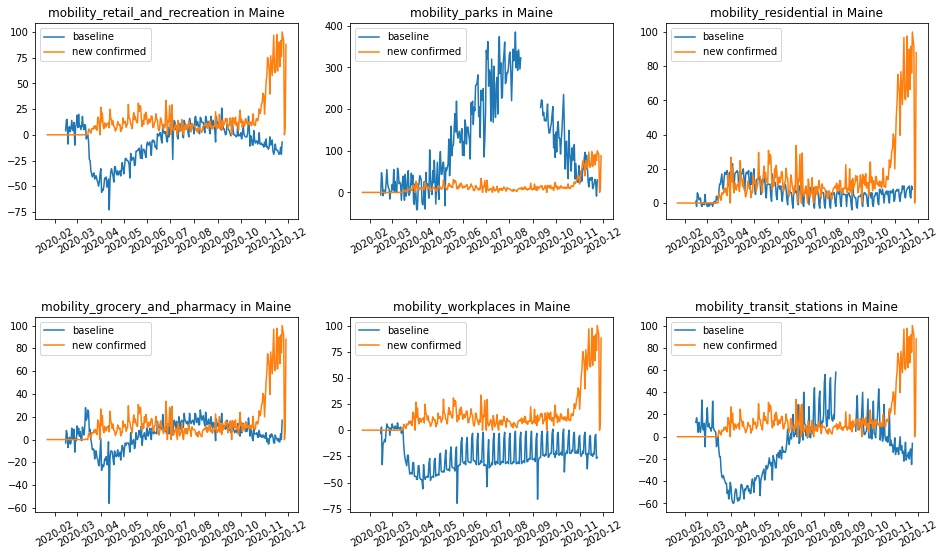

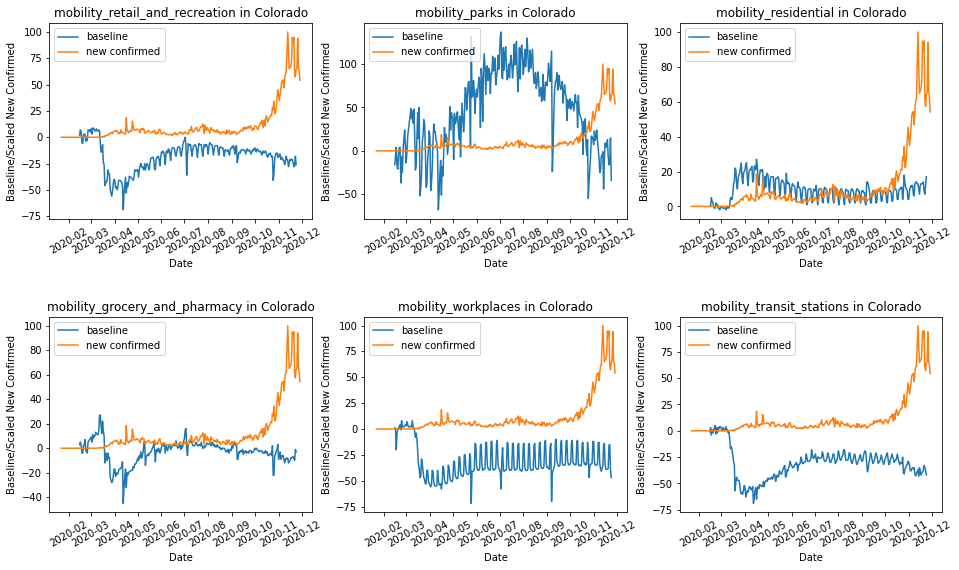

In [99]:
states = all_states
get_graph_for_states(states, mobility_list)